# Massage of Expect

Creation date: 2020-10-27

Initial authors: Axel Nyström

Commit to use: __insert__ __commit-sha__ __here__ in repository __repo__


## Summary

## Purpose
The purpose of this notebook is to manually go through the raw csv files from Expect (both Lund and Helsingborg) in order to determine how this data can be processed and stored in a postgresql database. Storing the data in a dbms will hopefully simplify and speed up the process of "asking questions of the data", selecting data to use as labels or features in a machine learning model, and so on. 

By the end of this notebook, it should be feasible to define the SQL structure for the different columns as well as write scripts that will read the csv files, massage them into the correct format and export them to an existing database. 

## Introduction


## Method
In order to write the scripts needed to usefully store the csv files in a postgresql database, there are certain questions I need to answer for each of the files. The idea is to look at each file and determine the following:

* Which columns are useful?
* What are the appropriate data types?
* What are appropriate names for each column?
* What would be suitable primary keys? Do we need a new primary key?
* If multiple columns look similar - how similar are they? Do I need both or can they be merged, or should one be removed?
* What, if any, transforms are needed for each column to bring it to a useful format?
* Is there any data that can't be turned into a suitable type?

I also want to figure out how different columns and fields relate to each other between the tables, so that I can design new database tables. It might therefore be necessary to attempt to join certain files to see what happens. 



## Imports 

In [1]:
import sys
sys.path.append('..')
import glob

In [2]:
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

#this is only for not seeing any warnings in the pdf
import warnings
warnings.filterwarnings('ignore')

In [3]:
lund_paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/*.csv')))
hbg_paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-HBG-2019-12-04/csv_filer/*.csv')))

In [4]:
def read_csv(path):
    return pd.read_csv(
        path,
        sep='|',
        index_col=False,
        encoding='latin-1'
    )

## Lund

In [5]:
lund_paths

['/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_Biokemi_samlet_id_Text.csv',
 '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_Lund_demografi_text.csv',
 '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_Lægemiddeldata_alle_id_L.csv',
 '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_Vårddata_alla_id_L.csv',
 '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_contact_final_id_L_Text.csv',
 '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_dodsdata_alle_id_text.csv

### Biokemi
File: ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_Biokemi_samlet_id_Text.csv

In [6]:
biokemi = pd.read_csv(
    lund_paths[0],
    sep='|',
    index_col=False,
    encoding='latin-1',
)
display(biokemi)

,Alias,dato_BP,value,value_org,namn,unit,minref,maxref,Reference,IUPAC
0,{839E571B-215F-4179-9C9F-80B6609060AB},23jul2013 14:31:59,1.21,1.21,S_Calciumjon,mmol/L,NaN,NaN,1.16-1.35,NPU01446
1,{839E571B-215F-4179-9C9F-80B6609060AB},23jul2013 14:31:59,129.00,129,B_Natrium,mmol/L,NaN,NaN,137-145,NPU03429
2,{839E571B-215F-4179-9C9F-80B6609060AB},23jul2013 14:31:59,4.10,4.1,B_Kalium,mmol/L,NaN,NaN,3.5-4.4,NPU03230
3,{839E571B-215F-4179-9C9F-80B6609060AB},23jul2013 14:31:59,9.50,9.5,P_Glukos,mmol/L,NaN,NaN,3.6-6.2,NPU02192
4,{839E571B-215F-4179-9C9F-80B6609060AB},23jul2013 14:31:59,88.00,88,B_Hemoglobin,g/L,NaN,NaN,117-153,NPU28309
...,...,...,...,...,...,...,...,...,...,...
1227305,{16672FBA-1726-414D-BDBB-6CF69F898D99},25aug2010 08:14:20,2.80,2.8,P_Kalium,mmol/L,3.2,4.7,NaN,NaN
1227306,{16672FBA-1726-414D-BDBB-6CF69F898D99},26aug2010 08:32:48,3.60,3.6,P_Kalium,mmol/L,3.2,4.7,NaN,NaN
1227307,{16672FBA-1726-414D-BDBB-6CF69F898D99},26aug2010 08:32:48,136.00,136,P_Natrium,mmol/L,136.0,146.0,NaN,NaN
1227308,{16672FBA-1726-414D-BDBB-6CF69F898D99},31aug2010 09:46:00,4.20,4.2,P_Kalium,mmol/L,3.2,4.7,NaN,NaN


In [7]:
biokemi.dtypes

Alias         object
dato_BP       object
value        float64
value_org     object
namn          object
unit          object
minref       float64
maxref       float64
Reference     object
IUPAC         object
dtype: object

In [8]:
biokemi.groupby(['namn'])['unit'].unique()

namn
AB_Glukos                                        [mmol/L]
AB_HCO                                           [mmol/L]
AB_Hb                                               [g/L]
AB_Kalium                                        [mmol/L]
AB_Klorid                                        [mmol/L]
AB_Kreatinin                                     [µmol/L]
AB_Natrium                                       [mmol/L]
B_Hemoglobin                [g/L, g/L       ,           ]
B_Kalium                                         [mmol/L]
B_Klorid                                         [mmol/L]
B_Kreatinin                                      [µmol/L]
B_Natrium                                        [mmol/L]
Ecv_BasÌ¦verskott        [mmol/L    , mmol/L,           ]
P_Albumin                               [g/L, g/L       ]
P_CRP                      [mg/L      , mg/L,           ]
P_Calcium                [mmol/L    , mmol/L,           ]
P_Glukos                 [mmol/L, mmol/L    ,           ]
P_Kalium 

In [9]:
biokemi.groupby(['namn'])['Reference'].unique()

namn
AB_Glukos                                [3.6-6.2, 4.2-6.3, 3.3-5.6, nan]
AB_HCO                                                       [22-27, nan]
AB_Hb                                    [117-153, nan, 134-170, 110-160]
AB_Kalium                                         [3.5-4.4, nan, 3.3-5.8]
AB_Klorid                                                        [98-110]
AB_Kreatinin                                         [45-90, nan, 60-105]
AB_Natrium                                                      [137-145]
B_Hemoglobin                             [117-153, nan, 134-170, 110-160]
B_Kalium                                                   [3.5-4.4, nan]
B_Klorid                                                         [98-110]
B_Kreatinin                                   [45-90, 60-105, nan, 37-72]
B_Natrium                                                       [137-145]
Ecv_BasÌ¦verskott                                        [nan, -3.0-+3.0]
P_Albumin                        

In [10]:
biokemi.groupby(['namn'])['IUPAC'].unique()

namn
AB_Glukos                    [NPU02192]
AB_HCO                       [NPU02410]
AB_Hb                        [NPU28309]
AB_Kalium                    [NPU03230]
AB_Klorid                    [NPU01536]
AB_Kreatinin                 [NPU04998]
AB_Natrium                   [NPU03429]
B_Hemoglobin            [NPU28309, nan]
B_Kalium                     [NPU03230]
B_Klorid                     [NPU01536]
B_Kreatinin                  [NPU04998]
B_Natrium                    [NPU03429]
Ecv_BasÌ¦verskott       [nan, NPU03815]
P_Albumin               [SWE05155, nan]
P_CRP                   [nan, NPU19748]
P_Calcium               [nan, NPU01443]
P_Glukos                [NPU02192, nan]
P_Kalium                [nan, NPU03230]
P_Klorid                [nan, NPU01536]
P_Kreatinin             [nan, NPU04998]
P_Natrium               [nan, NPU03429]
P_Standardbikarbonat    [nan, NPU02410]
P_TnT                   [NPU27501, nan]
S_Calciumjon            [NPU01446, nan]
S_Calciumjon_ph7_4      [nan, NPU04

In [11]:
biokemi['value_org_float'] = pd.to_numeric(biokemi['value_org'], errors='coerce')
biokemi['value_org_float'].isna().sum()

39718

In [12]:
biokemi['value'].isna().sum()

6190

In [13]:
values = biokemi[['value', 'value_org_float']].dropna(how='any')
(values['value'] - values['value_org_float']).sum()

1.0693668173189508e-12

In [14]:
# where is value nan and value_org_float not nan?
values = biokemi[['value', 'value_org_float']].dropna(subset=['value_org_float'])
values['value'].isna().sum()

0

### Biokemi conclusions
Holds blood samples with the following columns:
* Alias - patient id
* dato_BP - timestamp (presumably when the blood sample was ordered or finished)
* value - the result of the blood sample
* value_org - String representation of value, but it appears (see above) to agree with value wherever it can be parsed, and where value is missing, value_org can't be parsed. Conclusion: drop this column!
* namn - name of the blood sample - Some encoding errors in the name "Ecv_Basöverskott", otherwise this is a nice column with only a few blood samples. 
* unit - unit of the blood sample (text) - I think we can assume that the unit is always the same, and so we should be able to drop this column. 
* minref - minimum reference value - differs so much within the same sample type that I don't trust it
* maxref - maximum reference value
* Reference - minref, maxref span
* IUPAC - some kind of analysis code referring to the sample type. Probably not useful for us - drop it!

I can keep alias, date, value and name, and drop the rest.

In [15]:
biokemi = biokemi[['Alias', 'dato_BP', 'value', 'namn']].dropna()
biokemi['dato_BP'] = pd.to_datetime(biokemi['dato_BP'], format="%d%b%Y %H:%M:%S")
biokemi = biokemi.rename(columns={'dato_BP': 'date', 'namn': 'name'}).reset_index(drop=True)
biokemi

,Alias,date,value,name
0,{839E571B-215F-4179-9C9F-80B6609060AB},2013-07-23 14:31:59,1.21,S_Calciumjon
1,{839E571B-215F-4179-9C9F-80B6609060AB},2013-07-23 14:31:59,129.00,B_Natrium
2,{839E571B-215F-4179-9C9F-80B6609060AB},2013-07-23 14:31:59,4.10,B_Kalium
3,{839E571B-215F-4179-9C9F-80B6609060AB},2013-07-23 14:31:59,9.50,P_Glukos
4,{839E571B-215F-4179-9C9F-80B6609060AB},2013-07-23 14:31:59,88.00,B_Hemoglobin
...,...,...,...,...
1221115,{16672FBA-1726-414D-BDBB-6CF69F898D99},2010-08-25 08:14:20,2.80,P_Kalium
1221116,{16672FBA-1726-414D-BDBB-6CF69F898D99},2010-08-26 08:32:48,3.60,P_Kalium
1221117,{16672FBA-1726-414D-BDBB-6CF69F898D99},2010-08-26 08:32:48,136.00,P_Natrium
1221118,{16672FBA-1726-414D-BDBB-6CF69F898D99},2010-08-31 09:46:00,4.20,P_Kalium


### Demografi
File: ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_Lund_demografi_text.csv

In [16]:
demografi = pd.read_csv(
    lund_paths[1],
    sep='|',
    index_col=False,
    encoding='latin-1',
)
display(demografi)

,cpr_ok,Alias,foedaar,kon
0,1,{F705BAC9-45F7-4B70-A47E-C988696AC123},1926,0
1,1,{E01E1822-CC1E-4668-B55C-869A2D0CECB6},1967,1
2,1,{16C1672A-620B-4135-9A07-56519B470D8D},1976,0
3,1,{5644BB6A-6FA7-4AEE-9CFA-B1A7421CFB8F},1960,1
4,1,{5951CAA6-D74B-4D66-A826-C3FAB6B9B0DC},1977,0
...,...,...,...,...
153136,1,{DC3641A8-47A4-4998-BE76-66970EE5B5C5},2011,1
153137,0,{93598483-D5EF-4B4D-9799-E00D23448528},2011,1
153138,1,{4C6C6F11-30C9-4A19-A83F-C6924D843B86},2011,1
153139,1,{70D198B6-80C4-46EA-A362-A79A4AFFAF92},2011,0


In [17]:
demografi['Alias'].isna().sum()

0

In [18]:
len(demografi['Alias']) - len(demografi['Alias'].drop_duplicates())

0

In [19]:
len(demografi[demografi.cpr_ok == 0].Alias.unique())

4017

### Demografi conclusions
Birthyear and sex might be useful, but is probably present in other tables as well. Might wanna do a sanity-check to confirm that they agree. Other than that, if a patient is only present here, it isn't of any particular use to us, while if it present somewhere else and not here, this table is only misleading. We will want to build a patient table though, and this is the closest thing so far as a source for that.

We don't know what cpr_ok is, but it can probably be dropped safely. Pontus confirms this is probably not useful.

### Medication
File: ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_Lægemiddeldata_alle_id_L.csv

In [20]:
medication = pd.read_csv(
    lund_paths[2],
    sep='|',
    index_col=False,
    encoding='latin-1',
)
display(medication)

,Alias,UniqueTransactionId,TransactionId,TransactionDate,CareProfessionalOrganisationName,CareProfessionalServiceType,CareProfessionalPrescriberCatego,PrescriptionDate,PharmaceuticalProductATC,PharmaceuticalProductNPLPackId,PharmaceuticalProductArtNo,PharmaceuticalProductName,Quantity
0,{B742D863-DC65-41AF-87CB-8EF8A0E97BF4},20101427425038,1427425038,2010-09-08,"LAURENTIIKLINIKEN, VC, SÖDERGATAN 4, 22223, LUND","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2010-07-19,C07AB02,20041125100521,52051,Metoprolol Sandoz Depottablett,"1,00000"
1,{B742D863-DC65-41AF-87CB-8EF8A0E97BF4},20101438144706,1438144706,2010-09-30,"LAURENTIIKLINIKEN, VC, SÖDERGATAN 4, 22223, LUND","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2010-09-27,J01CE02,19801001100182,113902,Kåvepenin® Filmdragerad tablett,"1,00000"
2,{B742D863-DC65-41AF-87CB-8EF8A0E97BF4},20101442706991,1442706991,2010-10-11,"LAURENTIIKLINIKEN, VC, SÖDERGATAN 4, 22223, LUND","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2010-10-11,A11EX,19730101100061,405795,Malvitona® Oral lösning,"1,00000"
3,{B742D863-DC65-41AF-87CB-8EF8A0E97BF4},20101475603074,1475603074,2010-12-16,"LAURENTIIKLINIKEN, VC, SÖDERGATAN 4, 22223, LUND","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2010-07-19,C07AB02,20041125100521,52051,Metoprolol Sandoz Depottablett,"1,00000"
4,{B742D863-DC65-41AF-87CB-8EF8A0E97BF4},20111488952074,1488952074,2011-01-14,"LAURENTIIKLINIKEN, VC, SÖDERGATAN 4, 22223, LUND","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2010-07-19,C07AB02,20041125100521,52051,Metoprolol Sandoz Depottablett,"1,00000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951438,{F03DA91E-07B7-4362-9F8C-95C1636358DB},20142088889512,2088889512,2014-06-22,"BARNMOTT, LASARETTET, 23185, TRELLEBORG","BARN- OCH UNGDOMSMEDICINSK VÅRD, SPECIALISTVÅR...",LEG LÄKARE,2014-06-18,R03AK07,10010101130282,10008,Symbicort Turbuhaler Inhalationspulver,"1,00000"
3951439,{F03DA91E-07B7-4362-9F8C-95C1636358DB},20142095897915,2095897915,2014-07-06,"BARNMOTT, LASARETTET, 23185, TRELLEBORG","BARN- OCH UNGDOMSMEDICINSK VÅRD, SPECIALISTVÅR...",LEG LÄKARE,2014-06-18,R01AD12,20061109100750,88261,"Avamys Nässpray, suspension","1,00000"
3951440,{F03DA91E-07B7-4362-9F8C-95C1636358DB},20142112753191,2112753191,2014-08-14,"BARNMOTT, LASARETTET, 23185, TRELLEBORG","BARN- OCH UNGDOMSMEDICINSK VÅRD, SPECIALISTVÅR...",LEG LÄKARE,2014-06-18,R01AD12,20061109100750,88261,"Avamys Nässpray, suspension","1,00000"
3951441,{F03DA91E-07B7-4362-9F8C-95C1636358DB},20142135299276,2135299276,2014-10-02,"BARNMOTT, LASARETTET, 23185, TRELLEBORG","BARN- OCH UNGDOMSMEDICINSK VÅRD, SPECIALISTVÅR...",LEG LÄKARE,2014-09-25,R06AA04,19690401100027,139840,Tavegyl® Tablett,"1,00000"


In [21]:
list(medication)

['Alias',
 'UniqueTransactionId',
 'TransactionId',
 'TransactionDate',
 'CareProfessionalOrganisationName',
 'CareProfessionalServiceType',
 'CareProfessionalPrescriberCatego',
 'PrescriptionDate',
 'PharmaceuticalProductATC',
 'PharmaceuticalProductNPLPackId',
 'PharmaceuticalProductArtNo',
 'PharmaceuticalProductName',
 'Quantity']

In [22]:
medication.groupby('PharmaceuticalProductATC')['PharmaceuticalProductName'].unique()

PharmaceuticalProductATC
-          [Extempore e-förskrivning Ospecificerad, Bered...
A01        [Extempore Ospecificerad, Extempore ATC-kod A0...
A01AA01    [Dentan® Mint Munsköljvätska, Dentan® Munskölj...
A01AA30    [Xerodent® Sugtablett, Natriumfluorid-klorhexi...
A01AB03    [Corsodyl® Munhålegel, Hexident® Munsköljvätsk...
                                 ...                        
Y93FA00                                   [CoaguChek XS PT ]
Y93GA00                         [LoFric Insti-Cath Nelaton ]
Y93HA00    [Hydrocoll thin , DuoDERM Mini , DuoDERM Extra...
Y93HB00                                         [Dermasilk ]
Y93IA00                             [Xal-Ease , Azopt Eyot ]
Name: PharmaceuticalProductName, Length: 1366, dtype: object

Interestingly, there's multiple names for what is presumably the same product. Question to clinician then is there is any reason to care about the name, or if we only care about the ATC code as it were.

In [23]:
medication.CareProfessionalPrescriberCatego.value_counts()

LEG LÄKARE                               3728824
AT-LÄKARE                                  80331
SJUKSKÖTERSKA MED SÄRSKILD BEHÖRIGHET      79549
LÄKARE MED FÖRORDNANDE                     27698
TANDLÄKARE                                 12216
HJÄLPMEDELSFÖRSKRIVARE                      9201
BARNMORSKA                                  7134
DIETIST                                     3752
TANDHYGIENIST                               2738
Name: CareProfessionalPrescriberCatego, dtype: int64

In [24]:
medication.CareProfessionalOrganisationName.value_counts()

VC HÖRBY, RÅBYV 41, 24234, HÖRBY                                              152257
VC HÖÖR, STORG 2, 24330, HÖÖR                                                 136096
VC ARLÖV, SVENSHÖGSV 6, 23221, ARLÖV                                          121157
VC STAFFANSTORP, SÖDERG 2, 24522, STAFFANSTORP                                119582
VC KÄRRÅKRA, TROLLENÄSV 2, 24135, ESLÖV                                       116078
                                                                               ...  
RASMUSSON, LEIF, DAVIDHALLSGATAN 28, 20010, MALMÖ                                  1
KRIMINALVÅRDEN KRSTD, KRIMINALVÅRDSANST,VÄNDPUNKTSV 1, 29165, KRISTIANSTAD         1
ÖGON, ÄNGELHOLMS SJUKHUS, 26281, ÄNGELHOLM                                         1
STADSDEL HUSIE, HÖJAG 21, 20039, MALMÖ                                             1
ALLMÄNMEDICIN MALMÖ, REGEMENTSGATAN 62, 21751, MALMÖ                               1
Name: CareProfessionalOrganisationName, Length: 1195, dtype: int6

In [25]:
medication.dtypes

Alias                               object
UniqueTransactionId                  int64
TransactionId                        int64
TransactionDate                     object
CareProfessionalOrganisationName    object
CareProfessionalServiceType         object
CareProfessionalPrescriberCatego    object
PrescriptionDate                    object
PharmaceuticalProductATC            object
PharmaceuticalProductNPLPackId      object
PharmaceuticalProductArtNo           int64
PharmaceuticalProductName           object
Quantity                            object
dtype: object

In [26]:
medication['TransactionDate'] = pd.to_datetime(medication['TransactionDate'], format="%Y-%m-%d")
medication['PrescriptionDate'] = pd.to_datetime(medication['PrescriptionDate'], format="%Y-%m-%d")

In [27]:
diff = (medication.TransactionDate - medication.PrescriptionDate).dt.total_seconds() / (3600 * 24)

In [28]:
diff.describe()

count    3.951443e+06
mean     1.074146e+02
std      1.042052e+02
min     -8.500000e+01
25%      7.000000e+00
50%      8.000000e+01
75%      1.850000e+02
max      1.370000e+03
dtype: float64

In [29]:
diff[diff < 0].count()

63

<AxesSubplot:>

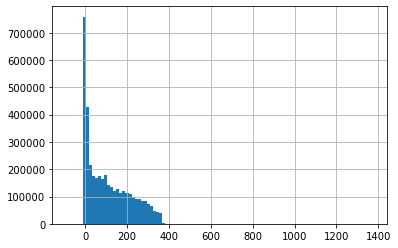

In [30]:
diff.hist(bins=100)

In [31]:
len(medication.UniqueTransactionId.unique()) - len(medication.TransactionId.unique())

0

In [32]:
meds = medication[["Alias", "TransactionDate", "PrescriptionDate", "PharmaceuticalProductATC"]]
len(meds) - len(meds.drop_duplicates())

107698

### Medication conclusions
We can probably drop everything except for:

* Alias
* TransactionDate
* PrescriptionDate
* PharmaceuticalProductATC

Questions for the doctors:

* Is there any reason to care about quantity? - Probably not. It would have been interesting to try to calculate the amount of each active substance, but we haven't found any API that allows us to do this programmatically. And even if we did, it is perhaps questionable whether it would actually be meaningful for the algorithm to begin with.  
* Is there any reason to care about the product name if we know the ATC? - No. Except if we try to calculate the amount of active substance, as discussed above. 
* Is transaction date the time when the patient collected the medicine? If so, then how do we explain the 63 cases where the medicine was collected before the prescription? Do we just drop those cases? - Probably that's what it is. The 63 cases could be the doctor forgetting something in his prescription and the patient calling afterwards.
* Can we say anything about the duplicates (where apparently the same type of medicine is prescribed and collected at the same times for the same patient)? This appears to be the result of the same medicine being prescribed in different quantities, say 5mg tablets plus 10mg tablets.


### Vårddata
File: ```ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_Vårddata_alla_id_L.csv```

This file appears to contain any and all contacts with the health care system for the selected patients. 

In [33]:
care = read_csv(lund_paths[3])
display(care)

,Alias,EventId,ECGIdentifiers,ActivityStartDate,DischargeDate,ActivityEndDate,ActivityLenghtDays,ActivityLenghtHours,CareProfessionalTypeCode,CareProfessionalType,...,ProceduralCodeKva10,ProceduralCodeKva11,ProceduralCodeKva12,ProceduralCodeKva13,ProceduralCodeKva14,ProceduralCodeKva15,DrugTreatment1,DrugTreatment2,DrugTreatment3,DrugTreatment4
0,{1EE6D48E-111A-4A6B-9B07-B6166223D348},11057317,NaN,2014-10-31,2014-10-31,2014-10-31,NaN,NaN,SSK,UNDERSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
1,{1EE6D48E-111A-4A6B-9B07-B6166223D348},11057336,NaN,2014-11-13,2014-11-13,2014-11-13,NaN,NaN,SSK,UNDERSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
2,{1EE6D48E-111A-4A6B-9B07-B6166223D348},11057339,NaN,2014-11-13,2014-11-13,2014-11-13,NaN,NaN,SSK,SJUKSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
3,{1EE6D48E-111A-4A6B-9B07-B6166223D348},11057370,NaN,2014-07-28,2014-07-28,2014-07-28,NaN,NaN,SSK,UNDERSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
4,{1EE6D48E-111A-4A6B-9B07-B6166223D348},11057394,NaN,2014-08-15,2014-08-15,2014-08-15,NaN,NaN,SSK,SJUKSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050192,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},3335916,NaN,2010-08-02,2010-08-02,2010-08-02,NaN,NaN,SSK,UNDERSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
4050193,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},3363891,NaN,2010-08-11,2010-08-11,2010-08-11,NaN,NaN,SSK,SJUKSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
4050194,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},3363961,NaN,2010-08-12,2010-08-12,2010-08-12,NaN,NaN,SSK,SJUKSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
4050195,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},3364094,NaN,2010-08-16,2010-08-16,2010-08-16,NaN,NaN,SSK,SJUKSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN


In [34]:
care.columns

Index(['Alias', 'EventId', 'ECGIdentifiers', 'ActivityStartDate',
       'DischargeDate', 'ActivityEndDate', 'ActivityLenghtDays',
       'ActivityLenghtHours', 'CareProfessionalTypeCode',
       'CareProfessionalType', 'CareActivityInpatientCare',
       'CareActivityPrimaryCare', 'CareContactTypeCode', 'CareContactType',
       'CareContactAccidentAndEmergencyA', 'Unit', 'Diagnose1', 'Diagnose2',
       'Diagnose3', 'Diagnose4', 'Diagnose5', 'Diagnose6', 'Diagnose7',
       'Diagnose8', 'Diagnose9', 'Diagnose10', 'Diagnose11', 'Diagnose12',
       'Diagnose13', 'Diagnose14', 'Diagnose15', 'ProceduralCodeOp1',
       'ProceduralCodeOp2', 'ProceduralCodeOp3', 'ProceduralCodeOp4',
       'ProceduralCodeOp5', 'ProceduralCodeOp6', 'ProceduralCodeOp7',
       'ProceduralCodeOp8', 'ProceduralCodeOp9', 'ProceduralCodeOp10',
       'ProceduralCodeOp11', 'ProceduralCodeOp12', 'ProceduralCodeOp13',
       'ProceduralCodeOp14', 'ProceduralCodeOp15', 'ProceduralCodeKva1',
       'ProceduralCodeKv

#### ECG identifiers

In [36]:
care.ECGIdentifiers.dropna().count()

0

Apparently this column is just filled with nans, so should be removed.

#### Activity Length

In [37]:
care.ActivityLenghtDays.dropna().count()

155573

In [38]:
care.ActivityLenghtHours.dropna().count()

155573

In [39]:
len(care) - len(care.EventId.unique())

0

In [228]:
care['DischargeDate'] = pd.to_datetime(care['DischargeDate'], format="%Y-%m-%d")
care['ActivityEndDate'] = pd.to_datetime(care['ActivityEndDate'], format="%Y-%m-%d")
care['ActivityStartDate'] = pd.to_datetime(care['ActivityStartDate'], format="%Y-%m-%d")
diff = (care.ActivityEndDate - care.DischargeDate).dt.total_seconds() / (3600 * 24)

In [41]:
diff.describe()

count    4049651.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
dtype: float64

In [42]:
care.DischargeDate.min(), care.DischargeDate.max()

(Timestamp('2008-01-06 00:00:00'), Timestamp('2015-10-05 00:00:00'))

Clearly ```DischargeDate``` and ```ActivityEndDate``` are the same. It remains to be seen if ActivityLength corresponds to the difference between ActivityStart and ActivityEnd.

In [248]:
diff = (care.ActivityEndDate - care.ActivityStartDate)

In [264]:
diff.dt.total_seconds().fillna(0)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4050192    0.0
4050193    0.0
4050194    0.0
4050195    0.0
4050196    0.0
Length: 4050197, dtype: float64

In [267]:
ddays = diff.dt.days.rename("days").rename("days")
dhours = (diff.dt.total_seconds().fillna(0) / 3600).rename("hours")
activity_length = care[["ActivityLenghtDays", "ActivityLenghtHours"]].join(
    [ddays, dhours]).dropna()
display(activity_length)

,ActivityLenghtDays,ActivityLenghtHours,days,hours
17,13.0,304.0,13.0,312.0
43,7.0,174.0,7.0,168.0
44,10.0,235.0,10.0,240.0
45,1.0,24.0,1.0,24.0
120,21.0,499.0,21.0,504.0
...,...,...,...,...
4050148,1.0,18.0,1.0,24.0
4050149,1.0,38.0,1.0,24.0
4050150,7.0,162.0,7.0,168.0
4050151,0.0,14.0,0.0,0.0


In [271]:
activity_length.ActivityLenghtDays.equals(activity_length.days)

True

<AxesSubplot:>

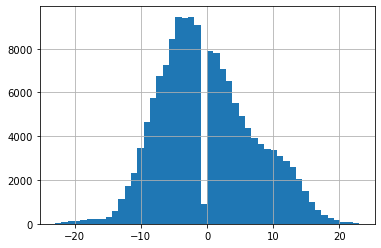

In [273]:
(activity_length.ActivityLenghtHours - activity_length.hours).hist(bins=48)

Apparently the activity length days are what we expected and can be safely calculated from the activity start and end dates. The activity duration in hours differs by up to 24 hours, and this is perhaps not surprising considering the start and end dates do not actually contain timestamps. The distribution looks sane however, and this column is probably safe to keep. 

#### Professional types

In [280]:
care.CareProfessionalTypeCode.value_counts()

LÃK    1870628
SSK     1491771
PAR      349783
LAB       91988
TEA       40855
HÃR      25758
SYN        8456
ORT        8094
ÃVR       6204
TV         1067
LÃR         18
Name: CareProfessionalTypeCode, dtype: int64

In [281]:
care.CareProfessionalType.value_counts()

LÃKARE                  1806662
SJUKSKÃTERSKA           1208145
UNDERSKÃTERSKA           222373
SJUKGYMNAST               221061
BIOMED ANALYTIKER          91988
TEAM INKL LÃKARE          58171
KURATOR                    45494
TEAM EXKL LÃKARE          40855
PSYKOLOG                   33349
ARBETSTERAPEUT             28700
MVC-BARNMORSKA             23319
AUDIONOM                   20243
DIETIST                    19129
BARNMORSKA                 12344
SKÃTARE                    9552
DIABETESSKÃTERSKA          9453
ÃVRIG VÃ
RDGIVARE          6204
LOGOPED                     5515
GIPSTEKNIKER                5371
SYNPEDAGOG                  5133
DISTRIKTSSKÃTERSKA         3795
ST-LÃKARE                  3309
FOTVÃ
RDSSPECIALIST         2665
OPTIKER                     1845
TRIAGESKÃTERSKA            1755
PSYKOTERAPEUT               1228
AT-LÃKARE                  1172
TANDHYGIENIST               1067
ORTOPTIST                    994
KONTAKTSJUKSKÃTERSKA        982
MVC-LÃKAR

In [279]:
care.groupby('CareProfessionalTypeCode')['CareProfessionalType'].unique()

CareProfessionalTypeCode
HÃR                                  [AUDIONOM, LOGOPED]
LAB                                   [BIOMED ANALYTIKER]
LÃK    [LÃKARE, TEAM INKL LÃKARE, ST-LÃKARE, AT-LÃ...
LÃR    [FRITIDSPEDAGOG, ANPASSNINGSLÃRARE, FÃRSKOLL...
ORT     [GIPSTEKNIKER, FOTVÃ
RDSSPECIALIST, ORTOPEDTEK...
PAR     [SJUKGYMNAST, ARBETSTERAPEUT, DIETIST, KURATOR...
SSK     [UNDERSKÃTERSKA, SJUKSKÃTERSKA, DIABETESSKÃ...
SYN     [OPTIKER, SYNPEDAGOG, ORTOPTIST, OFTALMOLOGASS...
TEA                                   [TEAM EXKL LÃKARE]
TV                                        [TANDHYGIENIST]
ÃVR                                 [ÃVRIG VÃ
RDGIVARE]
Name: CareProfessionalType, dtype: object

Possibly useful columns, but require some formatting. The type code is obviously a grouping of the type.

#### Accident and emergency

In [285]:
care.CareContactAccidentAndEmergencyA.dtypes

dtype('bool')

In [284]:
care.CareContactAccidentAndEmergencyA.mean()

0.15769035432103673

In [286]:
care.CareContactAccidentAndEmergencyA.sum()

638677

My guess is that this indicates an accident or emergency, but exactly how that is defined is not really clear. Is it whether the patient arrived by ambulance? Or called 112? 

#### Unit

In [287]:
care.Unit.value_counts()

HÃRBY PRIMÃRVÃ
RD| 24234 HÃRBY                                     155815
PRIMÃRVÃ
RD HÃÃR| STORG 2| 24330 HÃÃR                            150736
VUXENPSYKIATRI LUND| BARAVÃGEN 1| 22185 LUND                         150494
STAFFANSTORPS VÃ
RDCENTR| 24531 STAFFANSTORP                          139380
VÃ
RDCENTRALEN ARLÃV| 23221 ARLÃV                                   137641
                                                                       ...  
AVANCERAD SJUKVÃ
RD I HEMMET AKUT| LASARETTET I YSTAD| 27182 YSTAD         1
KBT VÃ
RDCENTRALEN LIMHAMN| ODENGATAN 47| 21614 LIMHAMN                    1
KBT TOMELILLAKLINIKEN| MALMÃVÃGEN 9| 27335 TOMELILLA                     1
HÃRCENTRALEN ÃNGELHOLM| ÃNGELHOLMS SJUKHUS| 26281 ÃNGELHOLM            1
KLINISK KEMI| LASARETTET I LANDSKRONA| 26124 LANDSKRONA                    1
Name: Unit, Length: 608, dtype: int64

It is a bit surprising to me that Hörby has the most entries. In any case, apart from coding issues, this information might be useful at some point. I notice that, annoyingly, ÅÄÖ are encoded in the same way, so all of these 608 entries would likely have to be fixed manually, if we cared about such a thing...

#### Contact type and type codes

In [44]:
care.groupby('CareContactTypeCode')['CareContactType'].unique()

CareContactTypeCode
AH                    [ANHÃRIGKONTAKT]
BR                        [BREVKONTAKT]
EG                         [EGENAVGIFT]
KB             [KVAL BREV- MAILKONTAKT]
KI                      [INTERNKONSULT]
KO                      [KONSULTBESÃK]
KT                [KVAL TELEFONKONTAKT]
NY                           [NYBESÃK]
SA                          [SAMVERKAN]
TB     [TELEFONKONTAKT TILL BESÃKSREG]
TE                     [TELEFONKONTAKT]
Ã
B                       [Ã
TERBESÃK]
Name: CareContactType, dtype: object

In [45]:
care['CareContactTypeCode'].value_counts()

Ã
B    1520346
NY      776844
TE      596750
BR      476172
KT      297632
KB       89511
SA       51175
KO       46729
TB       20554
KI        9326
EG        7930
AH        1655
Name: CareContactTypeCode, dtype: int64

The two columns appear to be the same thing, just that one of them is more compact (but less understandable). They both require some encoding fixes. 

#### Inpatient / Primary care

In [46]:
care.CareActivityInpatientCare.sum()

155573

In [47]:
care.CareActivityPrimaryCare.sum()

155573

In [48]:
care[care.CareActivityPrimaryCare == 1]

,Alias,EventId,ECGIdentifiers,ActivityStartDate,DischargeDate,ActivityEndDate,ActivityLenghtDays,ActivityLenghtHours,CareProfessionalTypeCode,CareProfessionalType,...,ProceduralCodeKva10,ProceduralCodeKva11,ProceduralCodeKva12,ProceduralCodeKva13,ProceduralCodeKva14,ProceduralCodeKva15,DrugTreatment1,DrugTreatment2,DrugTreatment3,DrugTreatment4
17,{1EE6D48E-111A-4A6B-9B07-B6166223D348},11322409,NaN,2014-09-30,2014-10-13,2014-10-13,13.0,304.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
43,{B4A5ADEB-45E7-4710-AD95-0510D9E5D38C},7540997,NaN,2012-02-29,2012-03-07,2012-03-07,7.0,174.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
44,{B4A5ADEB-45E7-4710-AD95-0510D9E5D38C},7544761,NaN,2012-02-19,2012-02-29,2012-02-29,10.0,235.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
45,{B4A5ADEB-45E7-4710-AD95-0510D9E5D38C},7551607,NaN,2012-02-18,2012-02-19,2012-02-19,1.0,24.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
120,{9193EFAC-5BE5-4690-87B6-3C5D2ADA5F0C},4077523,NaN,2010-10-21,2010-11-11,2010-11-11,21.0,499.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,",,,",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050148,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},2574181,NaN,2009-11-04,2009-11-05,2009-11-05,1.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
4050149,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},2574190,NaN,2009-11-10,2009-11-11,2009-11-11,1.0,38.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
4050150,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},2574215,NaN,2009-11-27,2009-12-04,2009-12-04,7.0,162.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
4050151,{DAF10BC1-03EF-4A6A-8638-5B02FE86121F},2574252,NaN,2009-12-23,2009-12-23,2009-12-23,0.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN


Apparently the ```CareActivityInpatientCare``` and ```CareActivityPrimaryCare``` indicate the same thing, presumably hospitalization, and these 155573 instances are also the ones where the activity length is recorded.

#### Diagnose 1-15

In [49]:
for i in range(1, 16):
    print(
        i, 
        care[f"Diagnose{i}"].dropna().count(), 
        care[f"ProceduralCodeOp{i}"].dropna().count(), 
        care[f"ProceduralCodeKva{i}"].dropna().count()
    )

1 1873858 141520 590731
2 700389 46400 145982
3 309415 11576 53103
4 165275 4328 21146
5 91888 0 10746
6 50706 0 0
7 28755 0 0
8 0 0 0
9 0 0 0
10 0 0 0
11 0 0 0
12 0 0 0
13 0 0 0
14 0 0 0
15 0 0 1436


Although the final 8 columns are not used, it is not entirely clear whether there is any significance in the position of different diagnoses. Arash has been talking about "primary diagnosis", which might correspond to ```Diagnose1```, but if this is actually the case is not known right now.

#### Diagnoses, I21 & U98
I will now look a little bit extra at the diagnoses where the patients are hospitalized, and in particular I will count the number of occurrences of certain codes when they occur in different columns. 

In [222]:
diagnoses = care[[f"Diagnose{i}" for i in range(1, 8)]]
diagnoses = diagnoses[care.CareActivityInpatientCare].dropna(how='all')
diagnoses

,Diagnose1,Diagnose2,Diagnose3,Diagnose4,Diagnose5,Diagnose6,Diagnose7
17,N390X,NaN,NaN,NaN,NaN,NaN,NaN
43,Q430,J449,A419,N179,NaN,NaN,NaN
44,Q430,NaN,NaN,NaN,NaN,NaN,NaN
45,Q430,J449,NaN,NaN,NaN,NaN,NaN
120,I489,E119,I109,R119B,R296,K309,NaN
...,...,...,...,...,...,...,...
4050147,F209,F718,F609,NaN,NaN,NaN,NaN
4050148,F209,F718,NaN,NaN,NaN,NaN,NaN
4050149,F209,F609,F718,NaN,NaN,NaN,NaN
4050150,F209,F609,F718,NaN,NaN,NaN,NaN


In [223]:
# I21 occurring in any of the diagnose columns
i21 = diagnoses[diagnoses.stack().str.startswith("I21").unstack().any(axis="columns")]
i21

,Diagnose1,Diagnose2,Diagnose3,Diagnose4,Diagnose5,Diagnose6,Diagnose7
434,I635,I489A,I219,Z867,F039,NaN,NaN
435,I634,I489A,I219,NaN,NaN,NaN,NaN
449,I214,NaN,NaN,NaN,NaN,NaN,NaN
450,I214,NaN,NaN,NaN,NaN,NaN,NaN
480,I219,I509,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3767896,I214A,I259,Z027,I109,Z720,NaN,NaN
3771346,I214B,U981,I109,E119,E039,I251,NaN
3771730,I210,Z955,I460,I259,Z921,NaN,NaN
3947585,I214A,U981,E039,I251,NaN,NaN,NaN


In [224]:
for i in range(1, 8):
    print(i, i21[f"Diagnose{i}"].str.startswith("I21").sum())

1 4354
2 720
3 243
4 82
5 43
6 36
7 24


In [225]:
# U98 occurring in any of the diagnose columns
u98 = diagnoses[diagnoses.stack().str.startswith("U98").unstack().any(axis="columns")]
u98

,Diagnose1,Diagnose2,Diagnose3,Diagnose4,Diagnose5,Diagnose6,Diagnose7
8310,I489,I214X,U982,NaN,NaN,NaN,NaN
16717,I210,U981,I259,E119,I109,N409,J459
16718,I210,U981,Z955,I259,E119,I109,N409
16719,I210,U981,I259,I251,E119,I109,N409
30944,I212,U981,I489,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3698767,I210,U981,F172,I251,NaN,NaN,NaN
3726632,I214,U981,Z027,NaN,NaN,NaN,NaN
3771346,I214B,U981,I109,E119,E039,I251,NaN
3947585,I214A,U981,E039,I251,NaN,NaN,NaN


In [274]:
# U98 in any column, but no I21 in any column
display(u98[~u98.stack().str.startswith("I21").unstack().any(axis="columns")])

,Diagnose1,Diagnose2,Diagnose3,Diagnose4,Diagnose5,Diagnose6,Diagnose7
46084,J819,U982,NaN,NaN,NaN,NaN,NaN
46085,J819,U982,NaN,NaN,NaN,NaN,NaN
66871,I489,Z921,U982,I350,NaN,NaN,NaN
82514,C209,D509,U982,NaN,NaN,NaN,NaN
143076,U981,I509,I109,NaN,NaN,NaN,NaN
145191,J189,U982,I509,NaN,NaN,NaN,NaN
240440,U982,D500,NaN,NaN,NaN,NaN,NaN
240442,U982,D500,NaN,NaN,NaN,NaN,NaN
431089,I480,D649,U982,NaN,NaN,NaN,NaN
434212,K369,U982,NaN,NaN,NaN,NaN,NaN


#### Procedural Codes

In [50]:
care.ProceduralCodeOp1.dropna()

36         FPE30
87         UJD02
89         XCK10
119        XCK10
167        XKD00
           ...  
4050071    LDA10
4050075    TNX30
4050076    XLE00
4050180    QCE10
4050187    TQX30
Name: ProceduralCodeOp1, Length: 141520, dtype: object

A quick googling reveals that for example XCK10 means "Fotografering av ögonbotten". This seems like it could be very useful indeed for ML!

In [51]:
care.ProceduralCodeKva1.dropna()

27         DF016
28         DF016
35         AF022
37         DF016
43         XS912
           ...  
4050110    AL004
4050112    AF021
4050145    AF063
4050182    AL003
4050184    AL003
Name: ProceduralCodeKva1, Length: 590731, dtype: object

DF016 means "Kontroll och omprogrammering av pacemaker eller defibrillator". It is not clear to me what the difference between "Op" and "Kva" is. More investigation needed!

In [52]:
care.ProceduralCodeKva15.value_counts()

,,,,    1436
Name: ProceduralCodeKva15, dtype: int64

Apparently the last procedural code is just nonsense.

#### Drug treatment

In [53]:
for i in range(1, 5):
    print(i, care[f"DrugTreatment{i}"].dropna().count())

1 67662
2 2467816
3 1530329
4 0


In [54]:
care.DrugTreatment1.value_counts()

,,,        50490
S01LA04     1846
L01XA02     1062
B01AA03      943
H02AB04      783
           ...  
N05CF          1
B05DA          1
N01BB52        1
N03AB02        1
J01FA01        1
Name: DrugTreatment1, Length: 471, dtype: int64

In [55]:
care.DrugTreatment2.value_counts()

,,    2467816
Name: DrugTreatment2, dtype: int64

In [56]:
care.DrugTreatment3.value_counts()

,    1530329
Name: DrugTreatment3, dtype: int64

In [356]:
care[['Alias', 'ActivityStartDate', 'ActivityEndDate']].sort_values(by=['Alias', 'ActivityStartDate', 'ActivityEndDate'])

,Alias,ActivityStartDate,ActivityEndDate
2576733,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-09-21,2012-09-21
2576732,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-11-13,2012-11-13
2576729,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-12-03,2012-12-03
2576734,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-12-05,2012-12-05
2576730,{0000DC49-AE86-4F86-9C3F-12F19F135FBE},2012-12-12,2012-12-12
...,...,...,...
2103099,{FFFCE9EE-3F15-4376-9857-FE49E2F97A3A},2013-03-26,2013-03-26
2103101,{FFFCE9EE-3F15-4376-9857-FE49E2F97A3A},2013-11-23,2013-11-23
2124492,{FFFCE9EE-3F15-4376-9857-FE49E2F97A3A},2013-11-29,2013-11-29
2124493,{FFFCE9EE-3F15-4376-9857-FE49E2F97A3A},2013-12-12,2013-12-12


The drug treatment columns looks really messy, I wonder why. It's only the first column that is used properly, and it needs to be cleaned to remove the strange commas. In total there's about 17000 possibly useful treatment codes, which might not be significant. But perhaps this column should be kept anyway. Question for the doctors or somebody who might be able to find out: do the commas mean something significant in the system?

### Vårddata conclusions
We can safely drop the following columns:

* ECGIdentifiers
* DischargeDate
* ActivityLengthDays
* One of: CareProfessionalType, CareProfessionalTypeCode
* One of: CareActivityInpatientCare, CareActivityPrimaryCare
* One of: CareContactTypeCode, CareContactType

Furthermore, we will move all DiagnoseX, ProceduralCodeOpX, ProceduralCodeKvaX and DrugTreatmentX columns to separate tables (one each for diagnosis, procedure_op and procedure_kva). 

It remains to be seen if the ```EventId``` column is referred to in any other table, but if it isn't, we should be able to drop it safely. Or we just use that as primary key, it doesn't really matter.

Questions to answer:

* What is the difference between Op and Kva?
* Do the commas in the drug-treatment tables mean anything in the system, or can we ignore them safely?


### Contact
File: ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_contact_final_id_L_Text.csv

In [57]:
contact = pd.read_csv(
    lund_paths[4],
    sep='|',
    index_col=False,
    encoding='latin-1',
)
display(contact)

,Alias,Nyckel,kontaktid_L,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,Inskrenhet,Utskrenhet,Avdelning1,Avdelning2,...,Markeringstext2,Markeringstext3,Sjukhus,Prio_initial,Besksorsak1,Besksorsak2,Besksorsak3,Besksorsak4,dod,dod_02_12_15
0,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},316144-3,3072-1,28apr2012 12:06:00,29apr2012 01:17:00,Till avdelning,LUKIR,LUKIR,Avd 4,NaN,...,NaN,NaN,SUSLu,3,yrsel,NaN,NaN,NaN,2014-02-09,1.0
1,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},316144-5,3072-2,02aug2012 09:08:00,02aug2012 12:06:00,Till hemmet,LUKIR,LUKIR,NaN,NaN,...,NaN,NaN,SUSLu,2,BukSm,NaN,NaN,NaN,2014-02-09,1.0
2,{B1F4FEE4-2538-413F-9C4E-1B54389C171D},316144-6,3072-3,26jun2013 16:49:00,27jun2013 01:53:00,Till sjukhus,LUNL,LUNL,NaN,NaN,...,NaN,NaN,SUSLu,3,Bortfall,NaN,NaN,NaN,2014-02-09,1.0
3,{C87751D0-3A73-48A8-A3D7-10FE0F88C966},613758-1,3079-1,06oct2011 11:54:00,06oct2011 14:42:00,Till avdelning,LUNL,LUNL,Avd 27,NaN,...,NaN,NaN,SUSLu,1,Bortfall,NaN,NaN,NaN,NaN,NaN
4,{9684D0C5-1EA0-4E1A-BFDB-A3CD32108F7C},297894-3,3083-1,17feb2012 12:40:00,17feb2012 18:46:59,Till hemmet,LUORT,LUORT,NaN,NaN,...,NaN,NaN,SUSLu,3,HandSk,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317159,{88A2BCEC-34D5-4A06-8354-1F0627472BFD},734157-2,13449-2,14dec2013 04:31:59,14dec2013 14:03:59,Till avdelning,LUMED,LUMED,MAVA,NaN,...,NaN,NaN,SUSLu,3,Arytmi,NaN,NaN,NaN,NaN,NaN
317160,{6BF5E124-685A-41DF-91F9-3EA530A5B298},422675-1,13453-1,19mar2010 17:09:00,19mar2010 19:09:59,Till avdelning,LUMED,LUMED,MAVA,NaN,...,NaN,NaN,SUSLu,2,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
317161,{6BF5E124-685A-41DF-91F9-3EA530A5B298},422675-2,13453-2,23apr2010 11:18:00,23apr2010 13:23:00,Till hemmet,LUTRI,LUMED,NaN,NaN,...,NaN,NaN,SUSLu,6,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
317162,{6BF5E124-685A-41DF-91F9-3EA530A5B298},422675-3,13453-3,18nov2013 14:45:00,18nov2013 17:29:59,Till hemmet,LUMED,LUMED,NaN,NaN,...,NaN,NaN,SUSLu,0,BrstSm,NaN,NaN,NaN,NaN,NaN


In [58]:
contact.columns

Index(['Alias', 'Nyckel', 'kontaktid_L', 'Inskrivningstid', 'Utskrivningstid',
       'Utskrivningsorsak', 'Inskrenhet', 'Utskrenhet', 'Avdelning1',
       'Avdelning2', 'Markeringstext1', 'Markeringstext2', 'Markeringstext3',
       'Sjukhus', 'Prio_initial', 'Besksorsak1', 'Besksorsak2', 'Besksorsak3',
       'Besksorsak4', 'dod', 'dod_02_12_15'],
      dtype='object')

#### Avdelning 1&2

In [59]:
contact.Avdelning1.value_counts()

MAVA         21543
KAVA         16773
Avd 25        4946
Avd 27        4082
AVD 8         3570
             ...  
ÃGONMOTT        3
Avd 16K          2
InfMott          1
Hemdia           1
PKT              1
Name: Avdelning1, Length: 75, dtype: int64

In [60]:
contact.Avdelning2.dropna().count()

1447

In [61]:
avdelning = contact[['Avdelning1', 'Avdelning2']].dropna(subset=['Avdelning2'])
avdelning[avdelning.Avdelning1 != avdelning.Avdelning2]


,Avdelning1,Avdelning2
120,ATH7,ATH 7
1506,V,ppenvrd
1812,V Akut,V akut
6164,ATH 7,ATH7
6403,ATH7,ATH 7
...,...,...
312055,V,ppenvrd
312085,V akut,V Akut
313206,V akut,V Akut
314279,ppenvrd,V


The difference between avdelning1 and avdelning2 is not obvious, and avdelning2 is barely used at all and can therefore probably be dropped. Might want to ask about this though. There is also clearly some coding issues, and many of these categories can probably be combined. 

#### Besöksorsak 1 - 4

In [62]:
for i in range(1, 5):
    print(i, contact[f"Besksorsak{i}"].dropna().count())

1 315285
2 10627
3 263
4 5


In [63]:
contact.Besksorsak1.value_counts()

BukSm         40239
HandSk        25887
BrstSm       21119
Dyspn        16182
FotSk         15066
              ...  
SpontBlÃ¶d        1
KrisReak          1
Toxeffdju         1
Nedkyl            1
AndnUpp           1
Name: Besksorsak1, Length: 288, dtype: int64

It is probably doable to just go through all the 288 categories here and give them better names, while also fixing the encoding issues. I would also move these 4 columns to a new table, referencing the contact primary key. It might also be useful to group the categories in different ways, and for this we could add extra columns in the new table. 

#### Markeringstext 1 - 3

In [64]:
for i in range(1, 4):
    print(i, contact[f"Markeringstext{i}"].dropna().count())

1 39731
2 2327
3 27


In [65]:
contact.Markeringstext1.value_counts()

Ambulans       25809
Remiss         10170
terbesk       2661
Trafikskada     1091
Name: Markeringstext1, dtype: int64

In [66]:
contact.Markeringstext2.value_counts()

Ambulans       1113
Remiss          863
Trafikskada     316
terbesk        35
Name: Markeringstext2, dtype: int64

In [67]:
contact.Markeringstext3.value_counts()

Remiss         11
Ambulans        7
Trafikskada     6
terbesk       3
Name: Markeringstext3, dtype: int64

In [68]:
markeringstext = contact[["Markeringstext1", "Markeringstext2", "Markeringstext3"]]
markeringstext.dropna(subset=['Markeringstext3'])

,Markeringstext1,Markeringstext2,Markeringstext3
7302,Ambulans,Trafikskada,Remiss
7753,Ambulans,Remiss,terbesk
20760,Trafikskada,Remiss,Ambulans
27118,Ambulans,Remiss,terbesk
28084,Remiss,Ambulans,Trafikskada
30793,Remiss,Ambulans,Trafikskada
33940,Remiss,Trafikskada,Ambulans
34282,Remiss,Ambulans,Ambulans
36910,Ambulans,Ambulans,Remiss
37082,Ambulans,Remiss,Remiss


Seems like these refer to categories that are not mutually exclusive. Since there are only 4 categories in total, we could convert these three columns to four binary columns instead, with one for each category. 

#### Sjukhus

In [69]:
contact.Sjukhus.value_counts()

SUSLu    317164
Name: Sjukhus, dtype: int64

Seems pretty useless, but I probably want to keep this anyway, or something like it, when merging this data with Helsingborg.

#### In/Utskrivningstid

In [70]:
contact['Inskrivningstid'] = pd.to_datetime(contact['Inskrivningstid'], format="%d%b%Y %H:%M:%S")
contact['Utskrivningstid'] = pd.to_datetime(contact['Utskrivningstid'], format="%d%b%Y %H:%M:%S")

In [71]:
contact.Inskrivningstid.describe()

count                  317164
unique                 294517
top       2011-09-16 19:30:00
freq                        5
first     2010-01-01 00:04:00
last      2014-12-31 23:55:59
Name: Inskrivningstid, dtype: object

<AxesSubplot:>

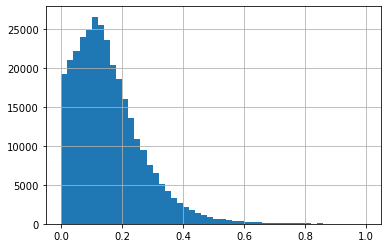

In [72]:
diff = (contact.Utskrivningstid - contact.Inskrivningstid).dt.seconds / (24 * 3600)
diff.hist(bins=50)

For once we have what looks like very clean data already! It seems like most patients only stay for about 2-3 hours. 

#### In/Utskrivningsenhet

In [73]:
contact.Inskrenhet.value_counts()

LUORT       83575
LUMED       81303
LUTRI       73888
LUKIR       46711
LUNL        16521
LU
NH        6173
LUURO        4740
LUBKIR       2059
LUÃNH       1954
LUINF         114
LUNK           57
LUTHO          54
LUKAT          12
TNRA           1
HÃSNÃR        1
BLKIR           1
Name: Inskrenhet, dtype: int64

In [74]:
contact.Utskrenhet.value_counts()

LUMED        108589
LUORT         87704
LUKIR         66425
LUNL          23906
LUTRI         11788
LU
NH          8206
LUURO          7487
LUÃNH         2325
LUBKIR          543
LUINF           108
LUNK             66
LUTHO            10
LUINFMOTT         6
MAKIIT            1
Name: Utskrenhet, dtype: int64

There's some coding issues here and probably some of these categories can be merged (e.g. LU NH and LUÃNH), but might need some help with this. Could maybe be useful to convert the initials to something understandable as well. 

#### Utskrivningsorsak

In [75]:
contact.Utskrivningsorsak.value_counts()

Till hemmet          202613
Till avdelning        83585
Avvikit                8344
Till primrvrd        8138
Till mottagning        6965
Till sjukhus           4810
Till primÃ¤rvÃ¥rd      1680
Avliden                 530
Avslutad                499
Name: Utskrivningsorsak, dtype: int64

In [354]:
contact[contact.Utskrivningsorsak == "Till mottagning"]

,Alias,Nyckel,kontaktid_L,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,Inskrenhet,Utskrenhet,Avdelning1,Avdelning2,...,Markeringstext2,Markeringstext3,Sjukhus,Prio_initial,Besksorsak1,Besksorsak2,Besksorsak3,Besksorsak4,dod,dod_02_12_15
19,{79D1CD42-1E61-4001-B70F-1E67C364BCCC},253410-10,13457-7,2014-07-11 17:06:00,2014-07-11 17:31:00,Till mottagning,LUKIR,LUKIR,NaN,NaN,...,NaN,NaN,SUSLu,0.0,BukSm,NaN,NaN,NaN,NaN,NaN
61,{6A9DF0C4-D40B-4B26-9F01-224EF26EAEB0},887567-1,31926-1,2014-06-27 13:02:59,2014-06-27 13:17:00,Till mottagning,LUMED,LUMED,NaN,NaN,...,NaN,NaN,SUSLu,0.0,gonBesv,NaN,NaN,NaN,NaN,NaN
146,{A621EE7D-5814-4F2A-87F2-95164870E4E3},546505-1,31920-1,2011-03-09 15:23:00,2011-03-09 15:38:00,Till mottagning,LUTRI,LUTRI,NaN,NaN,...,NaN,NaN,SUSLu,0.0,ronBesv,NaN,NaN,NaN,NaN,NaN
172,{586D3404-EB89-442A-A0FE-3888F8EA18CC},400795-1,31964-1,2010-01-16 05:18:00,2010-01-16 14:41:00,Till mottagning,LUMED,LUMED,NaN,NaN,...,NaN,NaN,SUSLu,3.0,BesvOspec,NaN,NaN,NaN,NaN,NaN
309,{16FA8B26-2CE6-48F6-A18B-3EBAA39C3474},633261-2,3109-2,2011-12-07 08:38:00,2011-12-07 11:10:59,Till mottagning,LUORT,LUORT,NaN,NaN,...,NaN,NaN,SUSLu,0.0,ExtrSm,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316723,{92652FD8-CB34-484D-BF3F-301BE4F9F762},337856-2,28537-1,2010-03-19 08:21:00,2010-03-19 08:26:59,Till mottagning,LUTRI,LUTRI,NaN,NaN,...,NaN,NaN,SUSLu,0.0,feber,NaN,NaN,NaN,NaN,NaN
316758,{4EE364A8-7757-4537-9E6C-E5384C9A5164},569644-1,13353-1,2011-05-19 07:09:00,2011-05-19 10:49:00,Till mottagning,LUNL,LUNL,NaN,NaN,...,NaN,NaN,SUSLu,2.0,HuvSm,NaN,NaN,NaN,NaN,NaN
317027,{04417030-8FBC-4486-A975-CD1696280478},615604-1,13423-1,2011-10-12 07:08:00,2011-10-12 08:54:00,Till mottagning,LUKIR,LUKIR,NaN,NaN,...,NaN,NaN,SUSLu,3.0,HuvudSk,NaN,NaN,NaN,NaN,NaN
317034,{024FA3CF-83F5-476F-8FA7-6E2BF01051E2},676382-1,13439-1,2012-04-26 11:58:00,2012-04-26 12:10:00,Till mottagning,LUTRI,LUTRI,NaN,NaN,...,NaN,NaN,SUSLu,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Can obviously merge some of these, but I would need some help here as well. What's the difference between "mottagning" and "avdelning" in this context, for example? What does "Avslutad" mean?

#### Keys
```Nyckel``` & ```kontaktid_L```

In [76]:
print(len(contact), len(contact.Nyckel.unique()), len(contact.kontaktid_L.unique()))

317164 317155 317164


In [77]:
contact[contact.Nyckel.duplicated(keep=False)].sort_values(by='Nyckel')

,Alias,Nyckel,kontaktid_L,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,Inskrenhet,Utskrenhet,Avdelning1,Avdelning2,...,Markeringstext2,Markeringstext3,Sjukhus,Prio_initial,Besksorsak1,Besksorsak2,Besksorsak3,Besksorsak4,dod,dod_02_12_15
161590,{BE62012F-9C52-4045-8636-BFC4EFAB0AAE},Apr-85,99225-1,2014-01-26 18:36:00,2014-01-26 18:46:59,Till hemmet,LUORT,LUORT,NaN,NaN,...,NaN,NaN,SUSLu,0,FotSk,NaN,NaN,NaN,NaN,NaN
98418,{3DA0869B-1366-4E9A-BB07-59742B5D05CF},Apr-85,63156-3,2014-03-01 13:21:59,2014-03-01 19:31:59,Till hemmet,LUMED,LUMED,NaN,NaN,...,NaN,NaN,SUSLu,2,BrstSm,NaN,NaN,NaN,NaN,NaN
172297,{50253716-524E-44C6-804E-1DD2735E42DF},Aug-54,88478-2,2014-08-23 16:25:59,2014-08-23 19:47:00,Till hemmet,LUKIR,LUKIR,NaN,NaN,...,NaN,NaN,SUSLu,2,HuvudSk,NaN,NaN,NaN,NaN,NaN
90710,{5B1963E5-0100-44D4-A834-002DB4A72D19},Aug-54,14805-1,2014-12-31 16:21:00,2014-12-31 19:57:00,Till hemmet,LUNL,LUNL,NaN,NaN,...,Ambulans,NaN,SUSLu,2,Bortfall,NaN,NaN,NaN,NaN,NaN
123094,{663F4581-B349-4D2C-9C15-B721AEB753F0},Jul-00,103719-1,2014-08-07 12:40:59,2014-08-07 15:32:00,Till hemmet,LUKIR,LUKIR,NaN,NaN,...,Remiss,NaN,SUSLu,3,BukSm,NaN,NaN,NaN,NaN,NaN
273847,{624D36D7-A525-4108-A5B9-AE9078295407},Jul-00,96415-5,2014-09-04 08:26:59,2014-09-04 10:34:59,Till avdelning,LUKIR,LUKIR,KAVA,NaN,...,NaN,NaN,SUSLu,2,BukSm,NaN,NaN,NaN,NaN,NaN
272728,{ED6B00E0-72DF-4493-8B85-50814C1D8EB9},Jul-23,79657-4,2014-10-01 09:04:59,2014-10-01 15:53:59,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,3,BrstSm,NaN,NaN,NaN,NaN,NaN
47069,{2F3EA3C2-73A4-46C7-B459-D4CED14C7286},Jul-23,6386-3,2014-12-09 18:49:59,2014-12-10 12:40:00,Till avdelning,LUMED,LUMED,NaN,Avd 7,...,Ambulans,NaN,SUSLu,2,BlskrHg,NaN,NaN,NaN,2015-02-05,1.0
126415,{676CA3D0-FB05-4F3C-9392-315CA789E703},Jun-01,103864-4,2014-05-30 17:10:00,2014-05-30 19:12:00,Till hemmet,LU NH,LU NH,NaN,NaN,...,Remiss,NaN,SUSLu,3,Infekt,NaN,NaN,NaN,NaN,NaN
20547,{762D74D2-37B9-445D-984A-7D595B183FEC},Jun-01,7096-3,2014-03-26 11:16:00,2014-03-26 19:08:00,Till avdelning,LUNL,LUNL,Avd 25,NaN,...,NaN,NaN,SUSLu,1,Bortfall,NaN,NaN,NaN,NaN,NaN


It is pretty clear that ```Nyckel``` is meant to be a unique key, but that there was some kind of encoding error (probably they imported this file into Excel at some point and some of the strings were silently and erroneously converted to dates). The ```kontaktid_L``` appears to be unique, but will only be useful if we can find a link to this particular visit from any other table. If not, we can drop it. 

#### Priority

In [78]:
contact.Prio_initial.unique()

array(['3', '2', '1', '0', '7', '6', '4', '5', ' ', 3, 4, 0, 2, 7, 6, 1,
       5], dtype=object)

In [79]:
contact['Prio_initial'] = pd.to_numeric(contact.Prio_initial, errors='coerce').fillna(0)

In [80]:
contact.Prio_initial.value_counts()

3.0    98104
0.0    73056
7.0    47897
2.0    44174
1.0    24572
6.0    15745
4.0    11725
5.0     1891
Name: Prio_initial, dtype: int64

I thought there were only 5 levels of priority, but here we appear to have 8. It is also not clear if blank spaces should be coded to priority 0, or if there should be a new category for missing priority. 

### Contact conclusions
This table appears to be the "patientliggare" from the ED, and it seems we have every entry in the period 2010-01-01 to 2014-12-31. 

We can drop Avdelning2, dod, dod_02_12_15 and Sjukhus (unless we later join with HBG). The death date should be obtained from the proper registry and doesn't really belong in this table anyway. Beskskorsak1-4 contain hundreds of categories that will require some effort to encode properly. 

Questions:
* Do they really have 8 levels or priority at Lund, or how should we interpret those values? Should empty priority be coded to 0 or something else?
* Why are there two columns for avdelning (Avdelning1 & Avdelning2)? Are there really 75 different ones? 
* How can we merge the categories in Utskrivningsorsak (9 categories)? 
* How can we merge the categories in In/Utskrivningsenhet (~17 categories)?
* How can we merge the categories in Avdelning 1/2 (~75 categories)?

Undecided:
* Can we find a reference to ```kontaktid_L``` with values looking like e.g. ```61605-2``` in any other table from Helsingborg? If not, we can drop the column and make our own primary key instead. 

### Deaths
Files: 

* ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_dodsdata_alle_id_text.csv
* ER_6b41df14-6090-47b8-85d6-71d256d9b767_Expect_R_DORS_7384_2019.csv

In [81]:
deaths = pd.read_csv(
    lund_paths[5],
    sep='|',
    index_col=False,
    encoding='latin-1',
)
display(deaths)

,Alias,dod,dod_02_12_15
0,{B742D863-DC65-41AF-87CB-8EF8A0E97BF4},2012-03-06,1
1,{425A81F1-88C6-45C0-A3B1-09730988D39F},2012-01-08,1
2,{76C1D582-D04A-43D9-A1F3-C0AA9F336A44},2011-08-03,1
3,{6542AC69-6F7B-4CA6-9D17-F32B73C79794},2011-11-26,1
4,{472953B3-E2A8-46C2-8A41-13F97D93881E},2012-02-04,1
...,...,...,...
9646,{C835F234-7267-4C8F-A85C-32C0CBF68CA7},2010-11-04,1
9647,{D97511A4-33B1-44EB-B39B-1991A3C9A346},2013-05-24,1
9648,{A567E6EB-89B2-4FE3-A278-3725D55F67AE},NaN,1
9649,{FC106AAD-87F5-45EE-BF36-91087E019615},2011-10-24,1


In [82]:
deathr = pd.read_csv(
    lund_paths[7],
    sep='|',
    index_col=False,
    encoding='latin-1',
)
display(deathr)

,Alias,DODSDAT,AR,ICD,KON,ULORSAK,KAP19,MORSAK1,MORSAK2,MORSAK3,...,RO40,RO41,RO42,RO43,RO44,RO45,RO46,RO47,RO48,FODDATN
0,{1E96ADB2-5BD2-4BD6-8DE9-DADD353ACFB9},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
1,{2779DA68-7875-46A2-8D31-30990A37D3F7},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
2,{F79CA89D-B921-421B-9A53-B89606383C7B},20100530.0,2010.0,10.0,2.0,G459,NaN,I469,G459,R54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907-02
3,{C8C56311-F6AA-4C57-BDB7-A559E8CA155F},20110805.0,2011.0,10.0,2.0,I5099,NaN,I469,I5099,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1905-05
4,{425A81F1-88C6-45C0-A3B1-09730988D39F},20120108.0,2012.0,10.0,2.0,R092,NaN,I469,R092,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1908-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198842,{167FBF08-F224-4AFD-9E28-66B3D3E5DEBB},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
198843,{C5152752-18B8-4996-B4AC-A841D8EE2CD6},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
198844,{DC93E1A9-D223-45ED-84CD-0D90054DD9EF},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
198845,{27F31625-3F43-4FAA-B1E9-8C5C67D37328},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.


In [83]:
list(deathr)

['Alias',
 'DODSDAT',
 'AR',
 'ICD',
 'KON',
 'ULORSAK',
 'KAP19',
 'MORSAK1',
 'MORSAK2',
 'MORSAK3',
 'MORSAK4',
 'MORSAK5',
 'MORSAK6',
 'MORSAK7',
 'MORSAK8',
 'MORSAK9',
 'MORSAK10',
 'MORSAK11',
 'MORSAK12',
 'MORSAK13',
 'MORSAK14',
 'MORSAK15',
 'MORSAK16',
 'MORSAK17',
 'MORSAK18',
 'MORSAK19',
 'MORSAK20',
 'MORSAK21',
 'MORSAK22',
 'MORSAK23',
 'MORSAK24',
 'MORSAK25',
 'MORSAK26',
 'MORSAK27',
 'MORSAK28',
 'MORSAK29',
 'MORSAK30',
 'MORSAK31',
 'MORSAK32',
 'MORSAK33',
 'MORSAK34',
 'MORSAK35',
 'MORSAK36',
 'MORSAK37',
 'MORSAK38',
 'MORSAK39',
 'MORSAK40',
 'MORSAK41',
 'MORSAK42',
 'MORSAK43',
 'MORSAK44',
 'MORSAK45',
 'MORSAK46',
 'MORSAK47',
 'MORSAK48',
 'ALDER',
 'DBGRUND1',
 'DBGRUND5',
 'DBGRUND6',
 'DBGRUND7',
 'DBGRUND8',
 'NARKOTIK',
 'NATION',
 'FLAND',
 'FCIV',
 'DODSPL',
 'DODUTL',
 'OPERERAD',
 'OPDAT',
 'FOBUTL',
 'NATION_FOBUTL',
 'PNRQ',
 'DOD_KOMMUN',
 'RO1',
 'RO2',
 'RO3',
 'RO4',
 'RO5',
 'RO6',
 'RO7',
 'RO8',
 'RO9',
 'RO10',
 'RO11',
 'RO12',
 'R

In [84]:
len(contact.Alias.unique())

153141

In [85]:
len(demografi.Alias.unique())

153141

In [86]:
len(biokemi.Alias.unique())

50433

In [87]:
len(deaths.Alias.unique())

9651

In [88]:
len(deathr.Alias.unique())

198847

In [89]:
df = contact[['Alias', 'dod', 'dod_02_12_15']].drop_duplicates().set_index('Alias')

In [90]:
df = df.join(deathr[['Alias', 'DODSDAT', 'FODDATN']].set_index('Alias'))
display(df)

,dod,dod_02_12_15,DODSDAT,FODDATN
Alias,,,,
{B1F4FEE4-2538-413F-9C4E-1B54389C171D},2014-02-09,1.0,20140209.0,1921-12
{C87751D0-3A73-48A8-A3D7-10FE0F88C966},NaN,NaN,20151203.0,1921-12
{9684D0C5-1EA0-4E1A-BFDB-A3CD32108F7C},NaN,NaN,NaN,.
{50FE8B11-81DC-4A68-A45A-6BBDD752ED8E},2010-03-26,1.0,20100326.0,1922-01
{6860E37C-F781-4B4B-8D4C-56227D0CD2C9},2011-04-24,1.0,20110424.0,1922-01
...,...,...,...,...
{3E63F021-1C2F-467B-AFF0-2CA0886249CD},NaN,NaN,NaN,.
{94A42DE4-D974-4347-B97B-29446F902832},2014-10-07,1.0,20141007.0,1931-10
{88A2BCEC-34D5-4A06-8354-1F0627472BFD},NaN,NaN,NaN,.


In [91]:
df.DODSDAT.min(), df.DODSDAT.max()

(20100000.0, 20151231.0)

In [92]:
df[df.DODSDAT <= 20100101.0]

,dod,dod_02_12_15,DODSDAT,FODDATN
Alias,,,,
{1FDDFC90-9D5C-49D0-9ADB-B1C20AB7BFF1},NaN,NaN,20100101.0,1912-02
{8D161EA4-600E-4ED0-9855-CF302202A8E2},NaN,NaN,20100000.0,1956-03


Presumably the second patient was declared dead sometime during 2010, but it is not known which day or even which month. Maybe the patient died at a different hospital, or was found dead in his apartment, or went missing and is presumed dead? Who knows. 

In [93]:
# Everybody who is dead according to the register, but not dead according to the contact list
foo = df.dropna(subset=['DODSDAT'])['dod']
df.loc[foo[foo.isna()].index]

,dod,dod_02_12_15,DODSDAT,FODDATN
Alias,,,,
{C87751D0-3A73-48A8-A3D7-10FE0F88C966},NaN,NaN,20151203.0,1921-12
{3953036B-DF99-436B-BC98-58572F69C9E5},NaN,NaN,20100124.0,1922-01
{5FA4709E-FBD0-4918-8057-DFB2CAD3E8FA},NaN,NaN,20150410.0,1931-10
{68EA97A3-05C3-4D48-94D9-881433B6874C},NaN,NaN,20120423.0,1921-12
{A0414598-C7D7-4DFA-83B7-ABB08C8B57C5},NaN,NaN,20140623.0,1921-12
...,...,...,...,...
{40244414-6EAA-4AC9-9455-059C9BE46B4B},NaN,NaN,20120910.0,1942-02
{B03BB743-09BB-4504-B3F9-E5EAB30931C2},NaN,NaN,20150814.0,1931-09
{B71EB0F4-B4C4-467C-B672-F5E05E62BEAD},NaN,NaN,20130427.0,1931-10


In [94]:
# Everybody who is dead according to the contact list, but not dead according to the register
foo = df.dropna(subset=['dod'])['DODSDAT']
df.loc[foo[foo.isna()].index]

,dod,dod_02_12_15,DODSDAT,FODDATN
Alias,,,,
{F185C149-D80C-4F1C-8DBB-B612D111DC2C},2015-01-03,1.0,NaN,.
{D792E8EE-1DC0-4FBA-B810-132E33E61804},2015-03-04,1.0,NaN,.
{06219633-875B-428B-8794-79C231A04BB1},2013-08-31,1.0,NaN,.
{3AB67400-5674-4021-BB8D-2F3259E4B879},2013-11-23,1.0,NaN,.
{6822DC11-4B07-4BBE-BAEE-23C3EEEC9357},2011-07-01,1.0,NaN,.
{2B007BA1-3F46-43E2-A98B-C818A03E5603},2013-11-19,1.0,NaN,.


We appear to have information about all the ~150k patients and whether they died within the 2010-2015 time window. If they died after 2015, then we don't know about it. Apart from that, there is a small number of patients that have apparently died according to the hospital records, but not according to the registry, and a fairly large number of patients who have died according to the registry unbeknownst to the hospital. 

One potential reason might be people with a protected identity, but I suppose we won't really find out. Of about 9600 deaths, only 6 are not in the register, which is roughly 1 in 1000. There are about 14000 people with protected identity in Sweden, 4000 of whom are children. So that's roughly 1 in 1000 adults with protected identity, so the numbers make sense.

The easiest solution is to take only death information from the registry and ignore those few with presumed protected identity.

In [95]:
deathr['KAP19'].dropna()

16        S720
23        S422
24        S720
27        S720
39        T887
          ... 
193899    S069
195116    S069
195377    S069
195912    S079
198497    T675
Name: KAP19, Length: 1145, dtype: object

Is the data in contact and deaths the same?

In [96]:
len(deaths.dropna()) - len(contact[['Alias', 'dod', 'dod_02_12_15']].drop_duplicates().dropna())

0

### Deaths conclusion
Should be able to use dödsorsaksregistret (dors) exclusively and drop all other columns, including the file "dodsdate_alle". Furthermore, we can drop a lot of columns from dors, some because they are not relevant for the time period that we are looking at, and some because we don't need them or can split them to a separate table. We can drop:

* AOLYCKA
* DBAVSER
* FOD_LAN
* STORSTAD
* UBASIC
* UNORDL
* PNRQ
* RO1-RO48 (this is the row and column of the death certificate in which the diagnosis was written)

We can split MORSAK1-48 into a separate table, where patient id + icd code would be the primary key. This would make things more compact, and it would be easier to search for all patients who died of a particular cause. 

### ECG
File: ER_6b41df14-6090-47b8-85d6-71d256d9b767_ExpectLund_ekg_samlet_id_L_Text.csv'

In [97]:
ecg = pd.read_csv(
    lund_paths[6],
    sep='|',
    index_col=False,
    encoding='latin-1',
)
display(ecg)

,Alias,EXPECTECGID,Record,Gender,Age,dato_ekg,Statements,Summary,heartrat,qrsaxis,...,stJ_V5,st20_V5,st40_V5,st60_V5,st80_V5,stJ_V6,st20_V6,st40_V6,st60_V6,st80_V6
0,{1595CB26-3BEA-4A13-84EF-5F81B3E04627},L2013-15187,U4_00045,Female,"33,24",15-Sep-2013 08:34:15,"SINUSRYTM ~ norm. P-axel, k.frekv. 50- 99MISS...",ICKE TILLG?GLIG.,69,77,...,-9,-3,-4,-4,-7,14,7,-2,-4,-6
1,{3E3BAC0D-6726-4BD7-AF64-046EBB816F7D},L2012-05397,U1_05397,Female,"31,76",27-Mar-2012 12:17:26,NORMAL SINUSRYTMNORMALT EKG,ICKE TILLG?GLIG.,90,17,...,4,-18,-38,-35,-27,40,0,-4,-3,-2
2,{ABA09206-56E3-4AEA-BCE2-8A5ACC69C0C0},L2011-13374,U7_07694,Female,"31,22",06-Sep-2011 19:10:49,"SINUSRYTM ~ norm. P-axel, k.frekv. 50- 99Stan...",ICKE TILLG?GLIG.,73,73,...,41,23,22,23,34,48,33,32,31,35
3,{B7E944F0-058B-47C1-9B84-6BA98121BCF5},L2012-16177,U2_01521,Male,"24,14",02-Oct-2012 01:47:01,"SINUSRYTM ~ norm. P-axel, k.frekv. 50- 99BASL...",ICKE TILLG?GLIG.,0,0,...,,,,,,,,,,
4,{212C0906-AADD-4988-9792-EF1CEEEE6C4A},L2010-03244,U5_01686,Male,"29,86",03-Apr-2010 00:39:42,"ï¿½DERN HAR INTE ANGIVITS, ANTAS VARA 50 ï¿½ G...",ICKE TILLGï¿½GLIG.,150,52,...,-24,11,39,90,167,13,-6,11,38,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98791,{A0D7AD73-804C-4C5D-AD3A-E43EB186809C},L2010-04559,U5_03001,Female,"81,25",28-Apr-2010 10:32:05,"SINUSRYTM ~ norm. P-axel, k.frekv. 50- 99Vï¿½...",ICKE TILLGï¿½GLIG.,63,-9,...,4,17,28,32,47,-6,12,18,31,46
98792,{6B9549FB-78AD-4995-A605-3876EEF852A9},L2012-11228,U1_11228,Male,"32,17",06-Jul-2012 06:12:18,F?MAKSFLIMMER ~ f?maksaktivitet ej identifierb...,ICKE TILLG?GLIG.,58,70,...,-11,117,178,216,246,-10,60,86,107,127
98793,{6B9549FB-78AD-4995-A605-3876EEF852A9},L2012-11226,U1_11226,Male,"32,17",06-Jul-2012 03:26:08,"SINUSRYTM ~ norm. P-axel, k.frekv. 50- 99TROL...",ICKE TILLG?GLIG.,62,64,...,-7,115,174,206,249,-36,24,42,55,79
98794,{ABC30BAE-09AE-4769-8171-290B66EB77E0},L2011-15850,U7_10170,Female,"31,52",12-Nov-2011 00:07:44,"SINUSRYTM ~ norm. P-axel, k.frekv. 50- 99MISS...",ICKE TILLG?GLIG.,77,84,...,-15,22,11,23,19,-11,15,6,5,13


In [98]:
list(ecg)

['Alias',
 'EXPECTECGID',
 'Record',
 'Gender',
 'Age',
 'dato_ekg',
 'Statements',
 'Summary',
 'heartrat',
 'qrsaxis',
 'paxis',
 'taxis',
 'print',
 'qtint',
 'qtcint',
 'qrs48sv',
 'qrs58sv',
 'qrs68sv',
 'qrs78sv',
 'ptermv1',
 'pdur_1',
 'pdur_2',
 'pdur_3',
 'pdur_4',
 'pdur_5',
 'pdur_6',
 'pdur_7',
 'pdur_8',
 'pdur_9',
 'pdur_10',
 'pdur_11',
 'pdur_12',
 'qrsdur_1',
 'qrsdur_2',
 'qrsdur_3',
 'qrsdur_4',
 'qrsdur_5',
 'qrsdur_6',
 'qrsdur_7',
 'qrsdur_8',
 'qrsdur_9',
 'qrsdur_10',
 'qrsdur_11',
 'qrsdur_12',
 'ponset_1',
 'ponset_2',
 'ponset_3',
 'ponset_4',
 'ponset_5',
 'ponset_6',
 'ponset_7',
 'ponset_8',
 'ponset_9',
 'ponset_10',
 'ponset_11',
 'ponset_12',
 'ppldur_1',
 'ppldur_2',
 'ppldur_3',
 'ppldur_4',
 'ppldur_5',
 'ppldur_6',
 'ppldur_7',
 'ppldur_8',
 'ppldur_9',
 'ppldur_10',
 'ppldur_11',
 'ppldur_12',
 'pplampl_1',
 'pplampl_2',
 'pplampl_3',
 'pplampl_4',
 'pplampl_5',
 'pplampl_6',
 'pplampl_7',
 'pplampl_8',
 'pplampl_9',
 'pplampl_10',
 'pplampl_11',


In [99]:
ecg.Record.dropna()

0        U4_00045
1        U1_05397
2        U7_07694
3        U2_01521
4        U5_01686
           ...   
98791    U5_03001
98792    U1_11228
98793    U1_11226
98794    U7_10170
98795    U3_11436
Name: Record, Length: 98796, dtype: object

It seems to me that the only data we really care about in this file is the alias, record and date. Everything else we can deduce either from the ECG record itself or from other tables. We will want to intersect the Record column with the "good" ECG record list, so that we don't have any invalid records in the database. Optionally, we could add an extra boolean column that indicates broken ECGs, in case we want to investigate any doctor reactions to the "bad" ecgs (maybe they took another ECG shortly after the first one, if there was a technical error). 

In [100]:
ecg = ecg[['Alias', 'Record', 'dato_ekg']]

In [101]:
ecg.dato_ekg

0        15-Sep-2013 08:34:15
1        27-Mar-2012 12:17:26
2        06-Sep-2011 19:10:49
3        02-Oct-2012 01:47:01
4        03-Apr-2010 00:39:42
                 ...         
98791    28-Apr-2010 10:32:05
98792    06-Jul-2012 06:12:18
98793    06-Jul-2012 03:26:08
98794    12-Nov-2011 00:07:44
98795    10-Jul-2013 19:26:38
Name: dato_ekg, Length: 98796, dtype: object

In [102]:
ecg['dato_ekg'] = pd.to_datetime(ecg['dato_ekg'], format="%d-%b-%Y %H:%M:%S")

In [103]:
len(ecg.Record.unique())

98796

In [104]:
ecg_counts = ecg.groupby('Alias')['Record'].count()

In [105]:
ecg_counts.describe()

count    53237.000000
mean         1.855777
std          2.065520
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        143.000000
Name: Record, dtype: float64

<AxesSubplot:>

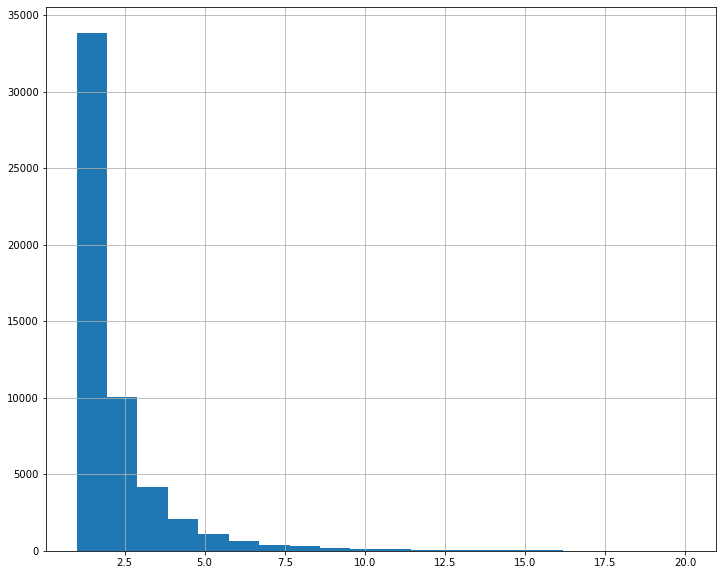

In [106]:
ecg_counts[ecg_counts<=20].hist(bins=20, figsize=(12, 10))

### The frequent flyer

In [107]:
ecg_counts[ecg_counts == 143]

Alias
{6E24B229-3961-4404-AE50-D323CDC5ED2D}    143
Name: Record, dtype: int64

In [108]:
pd.set_option('display.max_rows', 150)
ecg[ecg.Alias == '{6E24B229-3961-4404-AE50-D323CDC5ED2D}'].sort_values(by='dato_ekg')

,Alias,Record,dato_ekg
42454,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U6_01121,2010-02-27 20:26:30
42556,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_00874,2010-03-19 19:52:28
42351,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_03998,2010-05-17 13:55:56
42606,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_05702,2010-06-20 16:31:36
42414,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_06841,2010-07-12 12:27:53
42628,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_08384,2010-08-15 14:44:13
42468,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_09076,2010-08-29 23:15:34
42651,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_10687,2010-09-30 17:22:48
42501,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_11059,2010-10-07 13:27:42
42432,{6E24B229-3961-4404-AE50-D323CDC5ED2D},U5_11060,2010-10-07 13:29:37


In [109]:
contact[(contact.Alias == '{6E24B229-3961-4404-AE50-D323CDC5ED2D}') & (contact.Avdelning1 == 'HIA')].sort_values(by='Inskrivningstid')

,Alias,Nyckel,kontaktid_L,Inskrivningstid,Utskrivningstid,Utskrivningsorsak,Inskrenhet,Utskrenhet,Avdelning1,Avdelning2,...,Markeringstext2,Markeringstext3,Sjukhus,Prio_initial,Besksorsak1,Besksorsak2,Besksorsak3,Besksorsak4,dod,dod_02_12_15
302971,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-16,44463-1,2010-01-04 15:20:59,2010-01-04 16:30:00,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,1.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
300552,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-17,44463-2,2010-01-26 14:44:00,2010-01-26 16:34:59,Till avdelning,LUTRI,LUTRI,HIA,NaN,...,NaN,NaN,SUSLu,6.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
300563,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-18,44463-3,2010-02-27 20:18:00,2010-02-27 21:49:00,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,6.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
300574,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-19,44463-4,2010-03-19 19:46:00,2010-03-19 20:25:00,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,6.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
300585,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-21,44463-5,2010-04-30 15:53:59,2010-04-30 17:29:00,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,1.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
300611,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-22,44463-6,2010-05-17 13:09:00,2010-05-17 14:32:59,Till avdelning,LUTRI,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,6.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
300637,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-23,44463-7,2010-06-20 16:28:00,2010-06-20 17:42:00,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,1.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
300648,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-24,44463-8,2010-07-12 12:24:59,2010-07-12 16:02:59,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,1.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
300749,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-25,44463-9,2010-07-24 18:55:00,2010-07-24 21:30:59,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,2.0,BrÃ¶stSm,NaN,NaN,NaN,NaN,NaN
302998,{6E24B229-3961-4404-AE50-D323CDC5ED2D},141980-27,44463-11,2010-08-29 23:06:59,2010-08-29 23:28:00,Till avdelning,LUMED,LUMED,HIA,NaN,...,NaN,NaN,SUSLu,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
demografi[demografi.Alias == '{6E24B229-3961-4404-AE50-D323CDC5ED2D}']

,cpr_ok,Alias,foedaar,kon
964,1,{6E24B229-3961-4404-AE50-D323CDC5ED2D},1949,1


In [111]:
care[care.Alias == '{6E24B229-3961-4404-AE50-D323CDC5ED2D}']

,Alias,EventId,ECGIdentifiers,ActivityStartDate,DischargeDate,ActivityEndDate,ActivityLenghtDays,ActivityLenghtHours,CareProfessionalTypeCode,CareProfessionalType,...,ProceduralCodeKva10,ProceduralCodeKva11,ProceduralCodeKva12,ProceduralCodeKva13,ProceduralCodeKva14,ProceduralCodeKva15,DrugTreatment1,DrugTreatment2,DrugTreatment3,DrugTreatment4
2061066,{6E24B229-3961-4404-AE50-D323CDC5ED2D},4105983,NaN,2011-04-12,2011-04-12,2011-04-12,NaN,NaN,LÃK,LÃKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
2061067,{6E24B229-3961-4404-AE50-D323CDC5ED2D},4106571,NaN,2011-05-03,2011-05-03,2011-05-03,NaN,NaN,LÃK,LÃKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
2061068,{6E24B229-3961-4404-AE50-D323CDC5ED2D},4106885,NaN,2011-05-12,2011-05-12,2011-05-12,NaN,NaN,LÃK,LÃKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
2061069,{6E24B229-3961-4404-AE50-D323CDC5ED2D},4106953,NaN,2011-05-13,2011-05-13,2011-05-13,NaN,NaN,LÃK,LÃKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
2061070,{6E24B229-3961-4404-AE50-D323CDC5ED2D},4107438,NaN,2011-05-27,2011-05-27,2011-05-27,NaN,NaN,LÃK,LÃKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563261,{6E24B229-3961-4404-AE50-D323CDC5ED2D},12176953,NaN,2015-02-06,2015-02-06,2015-02-06,NaN,NaN,SSK,SJUKSKÃTERSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
2563262,{6E24B229-3961-4404-AE50-D323CDC5ED2D},12178414,NaN,2015-03-03,2015-03-03,2015-03-03,NaN,NaN,LAB,BIOMED ANALYTIKER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
2563263,{6E24B229-3961-4404-AE50-D323CDC5ED2D},12178415,NaN,2015-03-03,2015-03-03,2015-03-03,NaN,NaN,LAB,BIOMED ANALYTIKER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
2563264,{6E24B229-3961-4404-AE50-D323CDC5ED2D},12179345,NaN,2015-03-17,2015-03-17,2015-03-17,NaN,NaN,LAB,BIOMED ANALYTIKER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN


In [112]:
care[care.Alias == '{6E24B229-3961-4404-AE50-D323CDC5ED2D}'].Diagnose1.unique()

array([nan, 'R07-P', 'Z760', 'R52-', 'Z03-', 'D64-P', 'R104P', 'F19-P',
       'R074', 'M796', 'I208', 'I493', 'R104', 'I209', 'R104X', 'Z038E',
       'I200', 'I252', 'T784', 'Z952', 'I489', 'Z018', 'K808', 'Z450',
       'E117', 'K567', 'Z538', 'A081', 'M544', 'M545', 'K029', 'K083',
       'Z090', 'K317', 'Z719', 'M549', 'I259', 'M791', 'N201', 'E119',
       'K358', 'K590', 'K352', 'N20-', 'J01-', 'F410', 'M530', 'I209P',
       'F419', 'Z098', 'Z039', 'R060', 'Z034', 'E118P', 'J304P', 'Z02-',
       'R22-', 'I25-P', 'Z769P', 'J06-P', 'G473', 'J069', 'R194', 'K800',
       'K830', 'I201', 'I249', 'R091', 'E108P', 'T00-P', 'J22-P', 'M799',
       'D696', 'R45-P', 'R103P', 'I499', 'Z004', 'A099', 'F419P'],
      dtype=object)

In [113]:
medication[medication.Alias == '{6E24B229-3961-4404-AE50-D323CDC5ED2D}']

,Alias,UniqueTransactionId,TransactionId,TransactionDate,CareProfessionalOrganisationName,CareProfessionalServiceType,CareProfessionalPrescriberCatego,PrescriptionDate,PharmaceuticalProductATC,PharmaceuticalProductNPLPackId,PharmaceuticalProductArtNo,PharmaceuticalProductName,Quantity
2997403,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20121670862018,1670862018,2012-01-31,"VC HÖÖR, STORG 2, 24330, HÖÖR","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",AT-LÄKARE,2011-06-21,C01DA02,19860401100093,91322,Suscard® Buckaltablett,"1,00000"
2999367,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20142031523113,2031523113,2014-02-21,"VC HÖRBY, RÅBYV 41, 24234, HÖRBY","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2014-02-19,B01AA03,10010101105754,139857,Waran® Tablett,"1,00000"
3001157,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20142071543597,2071543597,2014-05-16,"VC HÖRBY, RÅBYV 41, 24234, HÖRBY","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2014-05-07,N05CM06,19950101100049,8722,Propavan Tablett,"1,00000"
3001868,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20142071543600,2071543600,2014-05-16,"VC HÖRBY, RÅBYV 41, 24234, HÖRBY","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2014-02-19,B01AA03,10010101105754,139857,Waran® Tablett,"1,00000"
3002745,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20142071543601,2071543601,2014-05-16,"VC HÖRBY, RÅBYV 41, 24234, HÖRBY","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2014-02-19,N02BE01,20030321100022,63551,Pamol Filmdragerad tablett,"3,00000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013287,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20152332107546,2332107546,2015-11-19,"VC HÖRBY, RÅBYV 41, 24234, HÖRBY","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2015-11-18,N05CF02,20011214103733,46760,Zolpidem STADA Filmdragerad tablett,"1,00000"
3013288,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20152332107537,2332107537,2015-11-19,"VC HÖRBY, RÅBYV 41, 24234, HÖRBY","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2015-11-18,R06AX27,20110526100734,107799,Desloratadine Actavis Filmdragerad tablett,"1,00000"
3013289,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20152332107544,2332107544,2015-11-19,"VC HÖRBY, RÅBYV 41, 24234, HÖRBY","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2015-11-18,N05BA04,19730101100214,407981,Sobril® Tablett,"1,00000"
3013290,{6E24B229-3961-4404-AE50-D323CDC5ED2D},20152332107542,2332107542,2015-11-19,"VC HÖRBY, RÅBYV 41, 24234, HÖRBY","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2015-08-14,N06AB06,20080205100044,37607,Sertralin Bluefish Filmdragerad tablett,"2,00000"


## Helsingborg

In [114]:
[(i, x.split('/')[-1][58:]) for i, x in enumerate(hbg_paths)]

[(0, 'Biokemi_samlet_id_H.csv'),
 (1, 'contact_final_id_H.csv'),
 (2, 'demografi_helsingborg.csv'),
 (3, 'dod_december2015_H.csv'),
 (4, 'ekg_Muse_id_H.csv'),
 (5, 'ekg_Phillips_id_H.csv'),
 (6, 'laegemiddel1_id_H_tekst.csv'),
 (7, 'laegemiddel2_id_H_tekst.csv'),
 (8, 'laegemiddel3_id_H_tekst.csv'),
 (9, 'laegemiddel4_id_H_tekst.csv'),
 (10, 'laegemiddel5_id_H_tekst.csv'),
 (11, 'laegemiddel6_id_H_tekst.csv'),
 (12, 'laegemiddel7_id_H_tekst.csv'),
 (13, 's-kvb_024-15_hbg_caredata_2016-10-19_b_pseudoanonymous.csv'),
 (14, 'vårddata1_id_H_tekst.csv'),
 (15, 'vårddata2_id_H_tekst.csv'),
 (16, 'vårddata3_id_H_tekst.csv'),
 (17, 'vårddata4_id_H_tekst.csv'),
 (18, 'vårddata5_id_H_tekst.csv'),
 (19, 'vårddata6_id_H_tekst.csv'),
 (20, 'pat_m_brsm_dyspné_L_Hbg_EXPECT_Finding.csv'),
 (21, 'pat_m_brsm_dyspné_L_Hbg_EXPECT_Procedure.csv'),
 (22, 'pat_m_brsm_dyspné_L_Hbg_EXPECT_SegmentDiagnostic.csv'),
 (23, 'pat_m_brsm_dyspné_L_Hbg_EXPECT_SegmentRestenos.csv')]

### Biokemi
File: Biokemi_samlet_id_H.csv

In [115]:
hbg_biokemi = read_csv(hbg_paths[0])
display(hbg_biokemi)

,Alias,dato_BP,namn,value,value_org,unit,ekgtid,plusminus
0,{C12156FF-63AD-4184-A3A1-1417762E3819},16jan2012 10:40:55,P_Glukos,7.60,7.6,mmol/L,2012-01-16 10:17:11,"0,016481481477967"
1,{C12156FF-63AD-4184-A3A1-1417762E3819},16jan2012 11:18:49,P_CRP,3.30,3.3,mg/L,2012-01-16 10:17:11,"0,042800925926713"
2,{C12156FF-63AD-4184-A3A1-1417762E3819},25jul2013 19:23:04,P_Natrium,135.00,135,mmol/L,2013-07-25 19:28:43,"-0,0039236111188075"
3,{C12156FF-63AD-4184-A3A1-1417762E3819},25jul2013 19:23:04,S_Calciumjon_ph7_4,1.19,1.19,mmol/L,2013-07-25 19:28:43,"-0,0039236111188075"
4,{C12156FF-63AD-4184-A3A1-1417762E3819},25jul2013 19:23:04,P_Standardbikarbonat,22.00,22,mmol/L,2013-07-25 19:28:43,"-0,0039236111188075"
...,...,...,...,...,...,...,...,...
1059953,{7DB27EBF-08BE-4826-A2CD-6D3D95FA1BD3},03nov2012 12:21:31,P_Klorid,104.00,104,mmol/L,2012-11-03 12:05:02,"0,011446759257524"
1059954,{7DB27EBF-08BE-4826-A2CD-6D3D95FA1BD3},03nov2012 12:59:10,P_CRP,2.50,2.5,mg/L,2012-11-03 12:05:02,"0,037592592590954"
1059955,{7DB27EBF-08BE-4826-A2CD-6D3D95FA1BD3},03nov2012 12:59:10,P_CRP,2.50,2.5,mg/L,2012-11-03 12:04:34,"0,037916666668025"
1059956,{7DB27EBF-08BE-4826-A2CD-6D3D95FA1BD3},03nov2012 13:06:14,P_TnT,9.00,9,ng/L,2012-11-03 12:04:34,"0,042824074072996"


In [116]:
hbg_biokemi.dtypes

Alias         object
dato_BP       object
namn          object
value        float64
value_org     object
unit          object
ekgtid        object
plusminus     object
dtype: object

#### Test names
There names of the tests appears to differ somewhat between Helsingborg and Lund. It is unclear if we can merge them or not.

In [117]:
hbg_biokemi.groupby(['namn'])['unit'].unique()

namn
AB_BasÌ¦verskott        [          , mmol/L]
AB_pCO2                    [kPa,           ]
AB_pH                   [pH enh,           ]
B_BasÌ¦verskott                     [mmol/L]
B_Hemoglobin                           [g/L]
D_dimer                               [mg/L]
Ecv_BasÌ¦verskott                   [mmol/L]
P_AB_Kalium                     [          ]
P_AB_Natrium                    [          ]
P_Albumin                              [g/L]
P_CRP                                 [mg/L]
P_Calcium                           [mmol/L]
P_Glukos                [mmol/L,           ]
P_Kalium                            [mmol/L]
P_Klorid                            [mmol/L]
P_Kreatinin                [åµmol/L, µmol/L]
P_Natrium                           [mmol/L]
P_Standardbikarbonat                [mmol/L]
P_TnT                                 [ng/L]
P_VB_Natrium                    [          ]
S_Calciumjon                        [mmol/L]
S_Calciumjon_ph7_4                  [mmol/L]
S_Kal

In [118]:
lund = set(biokemi.name.unique())
helsingborg = set(hbg_biokemi.namn.unique())
print(len(lund), len(helsingborg), len(lund | helsingborg), len(lund & helsingborg))

31 30 45 16


In [119]:
lund & helsingborg

{'B_Hemoglobin',
 'Ecv_BasÌ¦verskott',
 'P_Albumin',
 'P_CRP',
 'P_Calcium',
 'P_Glukos',
 'P_Kalium',
 'P_Klorid',
 'P_Kreatinin',
 'P_Natrium',
 'P_Standardbikarbonat',
 'P_TnT',
 'S_Calciumjon',
 'S_Calciumjon_ph7_4',
 'VB_pCO2',
 'VB_pH'}

In [120]:
(lund | helsingborg) - (lund & helsingborg)

{'AB_BasÌ¦verskott',
 'AB_Glukos',
 'AB_HCO',
 'AB_Hb',
 'AB_Kalium',
 'AB_Klorid',
 'AB_Kreatinin',
 'AB_Natrium',
 'AB_pCO2',
 'AB_pH',
 'B_BasÌ¦verskott',
 'B_Kalium',
 'B_Klorid',
 'B_Kreatinin',
 'B_Natrium',
 'D_dimer',
 'P_AB_Kalium',
 'P_AB_Natrium',
 'P_VB_Natrium',
 'S_Kalium',
 'S_Natrium',
 'U-Klorid',
 'U_Calcium',
 'U_Kalium',
 'U_Natrium',
 'VB_BasÌ¦verskott',
 'cvB_pCO2',
 'cvB_pH',
 'fP_Glukos'}

In [121]:
set([x.split('_')[0] for x in (lund | helsingborg)])

{'AB', 'B', 'D', 'Ecv', 'P', 'S', 'U', 'U-Klorid', 'VB', 'cvB', 'fP'}

We can probably merge many of the lab values, but should maybe also create a new column for the type of test, possibly based on the prefix of the lab-name. This should be confirmed by a doctor though.

#### Plusminus
Not clear what the plusminus column is, so let's find out!

In [122]:
hbg_biokemi.plusminus = hbg_biokemi.plusminus.str.replace(',', '.').astype(float)

In [123]:
hbg_biokemi.plusminus.describe()

count    1.059958e+06
mean     5.208641e-02
std      1.030279e-01
min     -8.328704e-02
25%      3.090278e-03
50%      1.755787e-02
75%      5.150463e-02
max      4.999537e-01
Name: plusminus, dtype: float64

<AxesSubplot:>

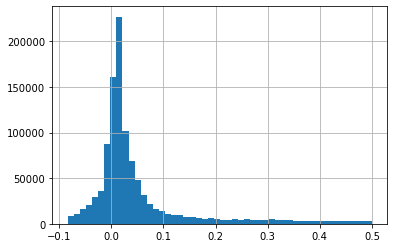

In [124]:
hbg_biokemi.plusminus.hist(bins=50)

In [125]:
hbg_biokemi.plusminus.dropna().count()

1059958

In [126]:
hbg_biokemi[hbg_biokemi.Alias == '{C12156FF-63AD-4184-A3A1-1417762E3819}'].head()

,Alias,dato_BP,namn,value,value_org,unit,ekgtid,plusminus
0,{C12156FF-63AD-4184-A3A1-1417762E3819},16jan2012 10:40:55,P_Glukos,7.60,7.6,mmol/L,2012-01-16 10:17:11,0.016481
1,{C12156FF-63AD-4184-A3A1-1417762E3819},16jan2012 11:18:49,P_CRP,3.30,3.3,mg/L,2012-01-16 10:17:11,0.042801
2,{C12156FF-63AD-4184-A3A1-1417762E3819},25jul2013 19:23:04,P_Natrium,135.00,135,mmol/L,2013-07-25 19:28:43,-0.003924
3,{C12156FF-63AD-4184-A3A1-1417762E3819},25jul2013 19:23:04,S_Calciumjon_ph7_4,1.19,1.19,mmol/L,2013-07-25 19:28:43,-0.003924
4,{C12156FF-63AD-4184-A3A1-1417762E3819},25jul2013 19:23:04,P_Standardbikarbonat,22.00,22,mmol/L,2013-07-25 19:28:43,-0.003924


In [127]:
t0 = pd.Timestamp('2013-07-25 19:23:04')
t1 = pd.Timestamp('2013-07-25 19:28:43')
(t0 - t1).total_seconds() / (24 * 3600)

-0.003923611111111111

Hmm, it appears as though plusminus is simply the dato_BP - ekgtid, in days. Since these timestamps don't differ significantly, and since "dato_BP" is the only timestamp we have from Lund, we should probably just stick to that one and drop ekgtid and plusminus completely.

In [128]:
len(hbg_biokemi) - len(hbg_biokemi.dato_BP.dropna())

0

### Biokemi conclusions
The table from Helsingborg and Lund differs both in what columns are included as well as in the specific values for the test names. As far as columns go, we only care about:

* Alias
* dato_BP
* namn
* value

Which is the same as for Lund - the rest of the columns we can drop. However, because of the differences in the test names that may arise from differences in testing equipment, we should probably try to combine all the 45 different lab names into categories that make sense, while at the same time creating a new column that indicates the type of test, possibly extracted from the prefix of the lab name. 

Questions for the doctors:
What would be a good way to combine the lab names? Does it make sense to use the lab name prefix for a new column, or is this nonsensical?

### Demografi
File: demografi_helsingborg.csv

In [129]:
hbg_demografi = read_csv(hbg_paths[2])
display(hbg_demografi)

,Alias,fdag,kon,demografi_OK
0,{27B71380-F1B8-4DAD-B9C9-D16EB71B23DA},12sep1966,1.0,1
1,{046C6BA3-914D-4A3D-BE51-40A375CECACA},28sep1935,1.0,1
2,{9827D0B4-AFAC-4D06-9BCF-A3610B8486C2},20sep1916,1.0,1
3,{746396ED-6F99-494D-9D02-F7C549038566},26dec1968,0.0,1
4,{CBAC2A20-A57A-4B2F-A40D-C728CA749CF3},05oct1920,1.0,1
...,...,...,...,...
47603,{A8C11BED-1C44-4189-A204-D829546947DD},11may1995,0.0,1
47604,{7295FFB3-A294-4FD5-BF1F-7D1BC4AFD67E},25may1995,0.0,1
47605,{CA190E67-8267-4E3A-8B30-918DD233D3C3},17jul1995,1.0,1
47606,{5D622ACF-A098-4056-9862-CA5C830018BC},11sep1995,0.0,1


We immediately note that we have the exact birth date for all the patients in Helsingborg, but only the birth year for patients in Lund. Birth year is probably enough anyway though. For the sake of removing under-age patients, we might want to consider everybody born on january 1st when doing age calculations. 

In [130]:
hbg_demografi.demografi_OK.describe()

count    47608.000000
mean         0.999517
std          0.021975
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: demografi_OK, dtype: float64

In [131]:
alias_hbg = set(hbg_demografi.Alias.unique())
alias_lund = set(demografi.Alias.unique())
print(len(alias_hbg), len(alias_lund), len(alias_hbg & alias_lund))

47608 153141 1895


Interesting that there are 3 times as many patients in Lund, but almost the same number of ECGs for Lund and HBG. Are they better at collecting ECGs in Helsingborg? Should ask Jakob about this. Another thing to consider, given that there is some overlap of patients, is if it's "fair" for a ML algorithm to make use of data from both locations simultaneously, if we compare to a doctor that probably only have access to data from one of the hospitals. Of course this is only an issue if the doctors don't have access to data from both hospitals. And even then it might not be necessary to worry about it. But the lab-values and patientliggaren and maybe other places as well, should perhaps keep track of where the data comes from.

In [132]:
sanity_check = hbg_demografi.set_index('Alias').join(
    demografi.set_index('Alias'), 
    lsuffix="hbg", 
    rsuffix="lund").dropna()
display(sanity_check)

,fdag,konhbg,demografi_OK,cpr_ok,foedaar,konlund
Alias,,,,,,
{27B71380-F1B8-4DAD-B9C9-D16EB71B23DA},12sep1966,1.0,1,1.0,1966.0,1.0
{046C6BA3-914D-4A3D-BE51-40A375CECACA},28sep1935,1.0,1,1.0,1935.0,1.0
{9827D0B4-AFAC-4D06-9BCF-A3610B8486C2},20sep1916,1.0,1,1.0,1916.0,1.0
{746396ED-6F99-494D-9D02-F7C549038566},26dec1968,0.0,1,1.0,1968.0,0.0
{CBAC2A20-A57A-4B2F-A40D-C728CA749CF3},05oct1920,1.0,1,1.0,1920.0,1.0
...,...,...,...,...,...,...
{2F5484D0-73A4-4394-869D-BFE79C3780F5},16mar1991,0.0,1,1.0,1991.0,0.0
{4A6F353C-4CEE-4131-BC50-70E96CA692AB},18may1992,0.0,1,1.0,1992.0,0.0
{C67BCAE3-79E0-49A0-A930-5BD9AD870735},13feb1993,0.0,1,1.0,1993.0,0.0


In [133]:
(sanity_check.konhbg - sanity_check.konlund).sum()

0.0

In [134]:
(sanity_check.fdag.apply(lambda x: float(x[-4:])) - sanity_check.foedaar).sum()

0.0

### Demografi conclusions
Should probably just drop birth day and keep only the year, to keep in line with what we have for Lund. 

Questions for the doctors:
* There are 3 times as many patients in Lund, but almost the same number of ECGs for Lund and HBG. Are they better at collecting ECGs in Helsingborg?
* Can a doctor in Lund access information about patients from Helsingborg, and vice versa? (I think yes, but if no, then does this require additional columns for information that comes exclusively from one hospital, to indicate the origin?)

### Medication
Files: laegemiddel1_id_H_tekst - laegemiddel7_id_H_tekst

Ids: 6-12

In [135]:
hbg_meds = [read_csv(hbg_paths[x]) for x in range(6, 13)]

In [136]:
display(hbg_meds[0])

,Alias,uniquetransactionid,transactionid,transactiondate,careprofessionalorganisationname,careprofessionalservicetype,careprofessionalprescribercatego,prescriptiondate,pharmaceuticalproductatc,pharmaceuticalproductnplpackid,pharmaceuticalproductartno,pharmaceuticalproductname,quantity
0,{AD45B2BD-A3D1-4B6B-800F-D7EBE081D947},20101436745154,1436745154,2010-09-28,"VC SÖDERÅSEN, ALMG 1, 26738, BJUV","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2010-01-14,N06AB04,19980626100385,17508,Citalopram® CNSpharma Filmdragerad tablett,",01400"
1,{AD45B2BD-A3D1-4B6B-800F-D7EBE081D947},20111522390944,1522390944,2011-03-23,"DSK, BJUV, BJUVS KOMMUN, 26734, BJUV","DISTRIKTSSKÖTERSKEVERKSAMHET, PRIMÄRVÅRD",SJUKSKÖTERSKA MED SÄRSKILD BEHÖRIGHET,2011-03-21,A06AD11,20040607106808,174763,Duphalac® Oral lösning,"1,00000"
2,{AD45B2BD-A3D1-4B6B-800F-D7EBE081D947},20111573174644,1573174644,2011-07-06,"VC SÖDERÅSEN, ALMG 1, 26738, BJUV","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2010-10-28,G04BD08,20040415100937,18694,Vesicare Filmdragerad tablett,",15556"
3,{AD45B2BD-A3D1-4B6B-800F-D7EBE081D947},20111651462817,1651462817,2011-12-18,"VC SÖDERÅSEN, ALMG 1, 26738, BJUV","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2011-09-06,B01AC06,20000307100032,1363,Trombyl® Tablett,",01400"
4,{AD45B2BD-A3D1-4B6B-800F-D7EBE081D947},20111553099544,1553099544,2011-05-25,"VC SÖDERÅSEN, ALMG 1, 26738, BJUV","DISTRIKTSLÄKARVÅRD, PRIMÄRVÅRD",LEG LÄKARE,2010-10-28,G04BD08,20040415100937,18694,Vesicare Filmdragerad tablett,",15556"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,{A9294CD9-804F-46F9-815F-96B003FC9272},20111495523904,1495523904,2011-01-27,"BARN/ UNGD MEDICINSKA KLIN, ÄNGELHOLMS SJUKHUS...","BARN- OCH UNGDOMSMEDICINSK VÅRD, SPECIALISTVÅR...",LEG LÄKARE,2011-01-25,R03BA02,20040107100184,94497,Giona Easyhaler® Inhalationspulver,"1,00000"
499995,{A9294CD9-804F-46F9-815F-96B003FC9272},20111506760625,1506760625,2011-02-18,"BARN/ UNGD MEDICINSKA KLIN, ÄNGELHOLMS SJUKHUS...","BARN- OCH UNGDOMSMEDICINSK VÅRD, SPECIALISTVÅR...",LEG LÄKARE,2010-12-02,R05DA20,19340101100017,36897,Lepheton® Oral lösning,"1,00000"
499996,{A9294CD9-804F-46F9-815F-96B003FC9272},20111511458064,1511458064,2011-03-01,"FOLKTANDVÅRDEN, , 00000, 0","ALLMÄN TANDVÅRD, TANDVÅRD",TANDLÄKARE,2011-02-28,J01CE02,19840907100018,78576,Kåvepenin® Filmdragerad tablett,"2,00000"
499997,{6AA9B744-029A-4A5C-824C-1A983928F014},20111650639835,1650639835,2011-12-17,"BARN/ UNGD MEDICINSKA KLIN, ÄNGELHOLMS SJUKHUS...","BARN- OCH UNGDOMSMEDICINSK VÅRD, SPECIALISTVÅR...",LEG LÄKARE,2011-04-19,R03BA02,19881001100443,382762,Pulmicort® Turbuhaler® Inhalationspulver,"2,00000"


In [137]:
for df in hbg_meds:
    print(len(df), set(list(df)) - set(list(hbg_meds[0])))


499999 set()
499999 {'quantity20111612069899'}
499999 {'quantity20121661905596'}
499999 {'quantity20121732719487'}
499999 {'quantity20131835424574'}
499999 {'quantity20142056517807'}
273474 {'quantity20142160482938'}


### Medication conclusions
Apparently the medicine data from Helsingborg comes in sets of 500k, with the only apparent difference being the final column name, which is easy to just rename. Apart from that, the data conforms with the data from Lund, so we should be able to use the information in the same way. 

### Vårddata
Files: 
```
vårddata1_id_H_tekst.csv - vårddata7_id_H_tekst.csv
s-kvb_024-15_hbg_caredata_2016-10-19_b_pseudoanonymous.csv
```

Ids: 13, 14-19

In [138]:
hbg_care = [read_csv(hbg_paths[x]) for x in range(13, 20)]

#### caredata 2016-10-19

In [139]:
display(hbg_care[0])

,Alias,eventid,ecgidentifiers,activitystartdate,dischargedate,activityenddate,activitylenghtdays,activitylenghthours,careprofessionaltypecode,careprofessionaltype,...,v78,v79,verksamhetsområdemedicinhälsosta,z514,i109,e119,i489,z921,ujf32,_merge
0,{0E6DF522-1357-4187-A8D6-5FA4513541B1},327055,NaN,2008-02-26,2008-02-26,2008-02-26,NaN,NaN,LÄK,LÄKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,{4C627EB8-F3D7-4DC4-A1FA-1B750E2263D9},327056,NaN,2008-03-03,2008-03-03,2008-03-03,NaN,NaN,LÄK,LÄKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,{A8D9A22F-9910-4345-B587-BDCF2782C9E7},327059,NaN,2008-02-26,2008-02-26,2008-02-26,NaN,NaN,LÄK,LÄKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,{FF44E3A9-56B9-46BD-B33B-F4D953C33C6C},327060,NaN,2008-03-03,2008-03-03,2008-03-03,NaN,NaN,LÄK,LÄKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,{7114B1BF-9E23-406B-969C-CB8A2CC3D907},327061,NaN,2008-03-03,2008-03-03,2008-03-03,NaN,NaN,LÄK,LÄKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011309,{76E87B2D-9E0A-4154-B410-202F518044EE},17904425,NaN,2014-04-21,2014-04-23,2014-04-23,2.0,47.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4011310,{84A2D1A5-B67C-4765-9CD9-4959CAE50E52},17904426,NaN,2014-02-18,2014-02-21,2014-02-21,3.0,71.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4011311,{34EB0605-2231-4BDE-B3DC-3D34ABE6D314},17904429,NaN,2014-05-05,2014-05-13,2014-05-13,8.0,200.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4011312,{A9BF82F0-1993-4382-ADD3-22EE29EB0B95},17904431,NaN,2014-04-16,2014-04-18,2014-04-18,2.0,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data


In [140]:
list(hbg_care[0])

['Alias',
 'eventid',
 'ecgidentifiers',
 'activitystartdate',
 'dischargedate',
 'activityenddate',
 'activitylenghtdays',
 'activitylenghthours',
 'careprofessionaltypecode',
 'careprofessionaltype',
 'careactivityinpatientcare',
 'careactivityprimarycare',
 'carecontacttypecode',
 'carecontacttype',
 'carecontactaccidentandemergencya',
 'unit',
 'diagnose1',
 'diagnose2',
 'diagnose3',
 'diagnose4',
 'diagnose5',
 'diagnose6',
 'diagnose7',
 'diagnose8',
 'diagnose9',
 'diagnose10',
 'diagnose11',
 'diagnose12',
 'diagnose13',
 'diagnose14',
 'diagnose15',
 'proceduralcodeop1',
 'proceduralcodeop2',
 'proceduralcodeop3',
 'proceduralcodeop4',
 'proceduralcodeop5',
 'proceduralcodeop6',
 'proceduralcodeop7',
 'proceduralcodeop8',
 'proceduralcodeop9',
 'proceduralcodeop10',
 'proceduralcodeop11',
 'proceduralcodeop12',
 'proceduralcodeop13',
 'proceduralcodeop14',
 'proceduralcodeop15',
 'proceduralcodekva1',
 'proceduralcodekva2',
 'proceduralcodekva3',
 'proceduralcodekva4',
 'proc

In [141]:
lund_care_aliases = set(care.Alias.unique())
hbg_care_aliases = set(hbg_care[0].Alias.unique())

In [142]:
print(
    len(lund_care_aliases), 
    len(hbg_care_aliases), 
    len(lund_care_aliases | hbg_care_aliases),
    len(lund_care_aliases & hbg_care_aliases)
)

55007 47434 101442 999


In [143]:
hbg_kva = hbg_care[0].dropna(axis='columns', how='all')
list(hbg_kva)

['Alias',
 'eventid',
 'activitystartdate',
 'dischargedate',
 'activityenddate',
 'activitylenghtdays',
 'activitylenghthours',
 'careprofessionaltypecode',
 'careprofessionaltype',
 'careactivityinpatientcare',
 'careactivityprimarycare',
 'carecontacttypecode',
 'carecontacttype',
 'carecontactaccidentandemergencya',
 'unit',
 'diagnose1',
 'diagnose2',
 'diagnose3',
 'diagnose4',
 'diagnose5',
 'diagnose6',
 'diagnose7',
 'diagnose8',
 'diagnose9',
 'diagnose10',
 'diagnose11',
 'diagnose12',
 'diagnose13',
 'diagnose14',
 'diagnose15',
 'proceduralcodeop1',
 'proceduralcodeop2',
 'proceduralcodeop3',
 'proceduralcodeop4',
 'proceduralcodeop5',
 'proceduralcodeop6',
 'proceduralcodeop7',
 'proceduralcodeop8',
 'proceduralcodeop9',
 'proceduralcodeop10',
 'proceduralcodeop11',
 'proceduralcodeop12',
 'proceduralcodeop13',
 'proceduralcodeop14',
 'proceduralcodeop15',
 'proceduralcodekva1',
 'proceduralcodekva2',
 'proceduralcodekva3',
 'proceduralcodekva4',
 'proceduralcodekva5',
 '

In [144]:
hbg_kva['_merge'].value_counts()

both in master and using data    4011314
Name: _merge, dtype: int64

In [310]:
len(hbg_kva.iloc[:, :-10].drop_duplicates())

4011314

In [311]:
len(hbg_kva.eventid.unique())

4011314

Apparently most of the additional columns were completely empty, and the ```_merge``` column carries no information. In fact, the only new columns compared to the data from Lund is the costs columns, so let's look a bit closer at them. 

In [145]:
costs = hbg_kva.set_index('eventid').iloc[:, -10:-1]
display(costs)

,costs,costs1615774,costs3102825,costs4415270,costs5822759,costs7480108,costs11449909,costs15523762,costs17875104
eventid,,,,,,,,,
327055,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327056,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327059,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327060,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
17904425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"30456,387696224625"
17904426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"41365,92952982858"
17904429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81339


In [146]:
for col in list(costs):
    print(len(costs[col].dropna()))

457024
465327
462669
462175
460456
461941
346469
469457
11406


In [147]:
def str_to_float(x):
    if isinstance(x, str):
        return float(x.replace(',', '.'))
    else:
        return float(x)

dfs = []
for col in list(costs):
    dfs.append(costs[col].dropna().apply(str_to_float))

In [148]:
new_costs = pd.concat(dfs)
display(new_costs)

eventid
327055          0.000000
327056          0.000000
327059          0.000000
327060          0.000000
327061          0.000000
                ...     
17904425    30456.387696
17904426    41365.929530
17904429    81339.000000
17904431    25814.358500
17904435    68137.000000
Length: 3596924, dtype: float64

In [149]:
len(costs.dropna(axis='index', how='all'))

3596924

In [150]:
new_costs.describe()

count    3.596924e+06
mean     2.939929e+03
std      1.583624e+04
min     -1.143148e+04
25%      0.000000e+00
50%      5.840100e+02
75%      1.583080e+03
max      3.973233e+06
dtype: float64

It was pretty easy to merge all the cost columns into a single one. The question remains however if the column is useful at all, or if it can even be trusted. In any case, I don't think we have anything similar from Lund.

#### Vårddata 1-7
I'm curious now if these files contain different information than the file I just examined, or if it's the same thing all over again.

In [151]:
list(hbg_care[1])

['Alias',
 'eventid',
 'ecgidentifiers',
 'activitystartdate',
 'dischargedate',
 'activityenddate',
 'activitylenghtdays',
 'activitylenghthours',
 'careprofessionaltypecode',
 'careprofessionaltype',
 'careactivityinpatientcare',
 'careactivityprimarycare',
 'carecontacttypecode',
 'carecontacttype',
 'carecontactaccidentandemergencya',
 'unit',
 'diagnose1',
 'diagnose2',
 'diagnose3',
 'diagnose4',
 'diagnose5',
 'diagnose6',
 'diagnose7',
 'diagnose8',
 'diagnose9',
 'diagnose10',
 'diagnose11',
 'diagnose12',
 'diagnose13',
 'diagnose14',
 'diagnose15',
 'proceduralcodeop1',
 'proceduralcodeop2',
 'proceduralcodeop3',
 'proceduralcodeop4',
 'proceduralcodeop5',
 'proceduralcodeop6',
 'proceduralcodeop7',
 'proceduralcodeop8',
 'proceduralcodeop9',
 'proceduralcodeop10',
 'proceduralcodeop11',
 'proceduralcodeop12',
 'proceduralcodeop13',
 'proceduralcodeop14',
 'proceduralcodeop15',
 'proceduralcodekva1',
 'proceduralcodekva2',
 'proceduralcodekva3',
 'proceduralcodekva4',
 'proc

At first sight it looks exactly the same as Lund (except the column names are lowercase), and the first 65 columns of the previous file. I wonder if the eventids are the same?

In [152]:
kvb_ids = set(hbg_care[0].eventid)
care_ids = set()
for df in hbg_care[1:]:
    new_ids = set(df.eventid)
    assert len(care_ids & new_ids) == 0
    care_ids |= new_ids

In [153]:
print(
    len(kvb_ids),
    len(care_ids),
    len(kvb_ids & care_ids),
    len(kvb_ids | care_ids)
)

4011314 2630871 2256773 4385412


Ok, so apparently there is a big overlap, but overall kvb contains twice as many events, and only about 20% of care is not in kvb. I wonder if the data is the same for the overlapping events, and if we could simply merge the two? But first, let's just fix the columns and merge all the care dataframes into one!

In [154]:
hbg_vard = hbg_care[1].append(hbg_care[2:], ignore_index=True)
hbg_vard = hbg_vard.dropna(axis='columns', how='all')

In [155]:
hbg_vard['activitystartdate'] = hbg_vard['activitystartdate'].fillna(hbg_vard['activitystart'])
hbg_vard = hbg_vard.drop(columns=['activitystart'])

In [156]:
display(hbg_vard)

,Alias,eventid,ecgidentifiers,activitystartdate,dischargedate,activityenddate,activitylenghtdays,activitylenghthours,careprofessionaltypecode,careprofessionaltype,...,proceduralcodekva2,proceduralcodekva3,proceduralcodekva4,proceduralcodekva5,proceduralcodekva6,proceduralcodekva7,drugtreatment1,drugtreatment2,drugtreatment3,drugtreatment4
0,{9FE859F8-25F2-46D8-9CF9-3C14AFD28583},1700131,NaN,2009-02-24,2009-02-24,2009-02-24,NaN,NaN,LÄK,LÄKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{9FE859F8-25F2-46D8-9CF9-3C14AFD28583},2732099,NaN,2010-12-01,2010-12-01,2010-12-01,NaN,NaN,LÄK,LÄKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{9FE859F8-25F2-46D8-9CF9-3C14AFD28583},1704725,NaN,2009-08-10,2009-08-10,2009-08-10,NaN,NaN,LÄK,LÄKARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{9FE859F8-25F2-46D8-9CF9-3C14AFD28583},2555775,NaN,2009-04-19,2009-04-20,2009-04-20,1.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{60881BD2-628C-4B19-B9FE-2E972D410D4A},2307702,NaN,2009-02-26,2009-02-26,2009-02-26,NaN,NaN,PAR,SJUKGYMNAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630866,{69325990-3522-4140-92E7-E5A8188B5729},11628093,NaN,2015-06-11,2015-06-11,2015-06-11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2630867,{69325990-3522-4140-92E7-E5A8188B5729},12380502,NaN,2015-09-02,2015-09-02,2015-09-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2630868,{69325990-3522-4140-92E7-E5A8188B5729},12344572,NaN,2015-06-15,2015-06-15,2015-06-15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2630869,{56510BC3-7C45-4686-A18F-BB6760EE91E9},12332191,NaN,2015-03-02,2015-03-02,2015-03-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
hbg_care_comb = hbg_vard.set_index('eventid').join(
    hbg_kva.set_index('eventid'), 
    how='inner', 
    lsuffix='vard', 
    rsuffix='kva'
)

In [158]:
list(hbg_care_comb)

['Aliasvard',
 'ecgidentifiers',
 'activitystartdatevard',
 'dischargedatevard',
 'activityenddatevard',
 'activitylenghtdaysvard',
 'activitylenghthoursvard',
 'careprofessionaltypecodevard',
 'careprofessionaltypevard',
 'careactivityinpatientcarevard',
 'careactivityprimarycarevard',
 'carecontacttypecodevard',
 'carecontacttypevard',
 'carecontactaccidentandemergencyavard',
 'unitvard',
 'diagnose1vard',
 'diagnose2vard',
 'diagnose3vard',
 'diagnose4vard',
 'diagnose5vard',
 'diagnose6vard',
 'diagnose7vard',
 'diagnose8vard',
 'diagnose9vard',
 'diagnose10vard',
 'diagnose11vard',
 'diagnose12vard',
 'diagnose13vard',
 'diagnose14vard',
 'diagnose15vard',
 'proceduralcodeop1vard',
 'proceduralcodeop2vard',
 'proceduralcodeop3vard',
 'proceduralcodeop4vard',
 'proceduralcodeop5vard',
 'proceduralcodeop6vard',
 'proceduralcodekva1vard',
 'proceduralcodekva2vard',
 'proceduralcodekva3vard',
 'proceduralcodekva4vard',
 'proceduralcodekva5vard',
 'proceduralcodekva6vard',
 'procedural

In [159]:
cols_same = []
cols_diff = []
for col in list(hbg_care_comb):
    if col[-4:] == 'vard':
        original_col = col[:-4]
        if hbg_care_comb[col].equals(hbg_care_comb[original_col+'kva']):
            cols_same.append(original_col)
        else:
            cols_diff.append(original_col)

print(cols_same)
print(cols_diff)

['Alias', 'activitystartdate', 'dischargedate', 'activityenddate', 'activitylenghtdays', 'activitylenghthours', 'careactivityinpatientcare', 'careactivityprimarycare', 'carecontactaccidentandemergencya', 'unit', 'diagnose1', 'diagnose2', 'diagnose3', 'diagnose4', 'diagnose5', 'diagnose6', 'diagnose7', 'proceduralcodeop1', 'proceduralcodeop2', 'proceduralcodekva1', 'proceduralcodekva2', 'proceduralcodekva3', 'proceduralcodekva4', 'proceduralcodekva5']
['careprofessionaltypecode', 'careprofessionaltype', 'carecontacttypecode', 'carecontacttype', 'diagnose8', 'diagnose9', 'diagnose10', 'diagnose11', 'diagnose12', 'diagnose13', 'diagnose14', 'diagnose15', 'proceduralcodeop3', 'proceduralcodeop4', 'proceduralcodeop5', 'proceduralcodeop6', 'proceduralcodekva6', 'proceduralcodekva7', 'drugtreatment1', 'drugtreatment2', 'drugtreatment3', 'drugtreatment4']


Interestingly, for some of the columns where "vard" and "kva" share events, the values are the same, but for others, they differ. Could it be that one of the tables is an update of the other, something like a more recent version? The columns diagnose1-7 are the same, but diagnose8-15 differ. proceduralcodeop1-2 are the same but proceduralcodeop3-6 differ. And the same deal with proceduralcodekva. All the drugtreatment columns are different. 

In [160]:
diagnose8 = hbg_care_comb[['diagnose8vard', 'diagnose8kva']].dropna(axis='index', how='all')
diagnose8[diagnose8.diagnose8vard.isna()]

,diagnose8vard,diagnose8kva
eventid,,
4064252,NaN,E039
4072972,NaN,I252
4544953,NaN,I693
4066182,NaN,L900
4064147,NaN,E039
...,...,...
9312736,NaN,Z518
9312834,NaN,O990
9303170,NaN,C752


In [161]:
temp = diagnose8.dropna(how='any')
temp.diagnose8vard.equals(temp.diagnose8kva)

True

This seems to indicate (for the diagnose8 column) that while there are 3364 rows where the "vard" table is empty but "kva" has data, for all rows where they both have data, they agree on the value. I will check that the same pattern holds for the other columns as well.

In [162]:
for col in cols_diff:
    filled = hbg_care_comb[col+'vard'].fillna(hbg_care_comb[col+'kva'])
    if filled.equals(hbg_care_comb[col+'kva']):
        print(f'For {col}, vard is subset of kva')
    else:
        print(f'For {col}, vard is NOT subset of kva!')

For careprofessionaltypecode, vard is subset of kva
For careprofessionaltype, vard is subset of kva
For carecontacttypecode, vard is subset of kva
For carecontacttype, vard is subset of kva
For diagnose8, vard is subset of kva
For diagnose9, vard is subset of kva
For diagnose10, vard is subset of kva
For diagnose11, vard is subset of kva
For diagnose12, vard is subset of kva
For diagnose13, vard is subset of kva
For diagnose14, vard is subset of kva
For diagnose15, vard is subset of kva
For proceduralcodeop3, vard is subset of kva
For proceduralcodeop4, vard is subset of kva
For proceduralcodeop5, vard is subset of kva
For proceduralcodeop6, vard is subset of kva
For proceduralcodekva6, vard is subset of kva
For proceduralcodekva7, vard is subset of kva
For drugtreatment1, vard is subset of kva
For drugtreatment2, vard is subset of kva
For drugtreatment3, vard is subset of kva
For drugtreatment4, vard is subset of kva


### Vårddata Conclusions
Helsingborg has care data from two sources: a set of 7 files containing about 500k entries each (I have called these "vard" in my lack of imagination), and an additional file containing some 4 million entries, which I have called "kva". 

The kva table had a large number of empty columns that could be discarded, as well as a number of "cost" columns that could be combined into a single column. It is not clear if we can use the cost though, especially since we don't have the same data from Lund. Anyway, the remaining columns were by and large the same as those from "vard", which in turn are the same as those from Lund. I haven't looked at the actual values that much, but rather just assumed that things work the same as in Lund in terms of the actual contents. 

The "vard" files can be combined into a single table without too much hassle. The first file uses the column "activitystartdate", while the rest uses "activitystart". The last files also contain a number of new columns, but they were all empty and can therefore be dropped. 

Kva contains about twice as many events as vard, and only about 20% of the entries in vard are not in kva. For the entries that are in both, it seems that kva is a superset of vard, and so the easiest approach will be to just take the kva table and append the missing events from vard. 

### Contact
File: contact_final_id_H.csv

In [163]:
hbg_contact = read_csv(hbg_paths[1])

In [164]:
display(hbg_contact)

,key_contact,Alias,age,kon,demografi_OK,indl_dato,ud_dato,vistelsetid,discharge_text,infirmary_code,...,akut_diag02,akut_diag03,akut_diag04,akut_diag05,akut_diag06,ud_diag01,ud_diag02,ud_diag03,dod_december2015,dod_dato
0,247649-3,{9F56BB00-210E-44B5-BC62-A16E90EA864C},85.530457,0,1,09jun2011 02:16:00,09jun2011 06:14:00,239.0,Till hemmet,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,247649-7,{9F56BB00-210E-44B5-BC62-A16E90EA864C},86.633812,0,1,16jul2012 15:25:00,16jul2012 19:09:00,224.0,Till hemmet,,...,N390A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,247649-9,{9F56BB00-210E-44B5-BC62-A16E90EA864C},87.433266,0,1,04may2013 13:56:00,04may2013 19:35:00,339.0,Till hemmet,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,627748-2,{482C83F9-392C-4A8C-B73C-7C5B3B7AE2EC},86.622864,1,1,14jul2012 13:15:00,14jul2012 14:37:00,82.0,Till avdelning,AVA-KIR,...,NaN,NaN,NaN,NaN,NaN,S223,NaN,NaN,0,NaN
4,154674-3,{091258EC-D65B-46FD-8010-DF3427FA17C2},86.967827,1,1,17nov2012 20:43:00,17nov2012 23:13:00,151.0,Till avdelning,AVA-H,...,NaN,NaN,NaN,NaN,NaN,J189,I489,M353,1,03may2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81195,286577-3,{D86ABA0C-13A7-4555-90CA-8D5AB32F0452},87.148529,0,1,19jan2013 12:25:00,19jan2013 18:34:00,369.0,Till hemmet,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
81196,286577-4,{D86ABA0C-13A7-4555-90CA-8D5AB32F0452},87.411362,0,1,25apr2013 13:11:00,25apr2013 16:12:00,182.0,Till avdelning,AVA-H,...,NaN,NaN,NaN,NaN,NaN,I209,I109,E785,0,NaN
81197,514470-1,{96ADC08C-A02D-4485-868B-BB62450F301A},85.010269,0,1,30nov2010 06:04:00,30nov2010 13:31:00,448.0,Till avdelning,NÌ?rsjukvÌ´rdsavdelning,...,NaN,NaN,NaN,NaN,NaN,R074,NaN,NaN,0,NaN
81198,247649-11,{9F56BB00-210E-44B5-BC62-A16E90EA864C},88.402466,0,1,23apr2014 17:07:00,23apr2014 21:21:00,255.0,Till hemmet,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [165]:
list(hbg_contact)

['key_contact',
 'Alias',
 'age',
 'kon',
 'demografi_OK',
 'indl_dato',
 'ud_dato',
 'vistelsetid',
 'discharge_text',
 'infirmary_code',
 'visitcause_longtext_1',
 'visitcause_longtext_2',
 'visitcause_longtext_3',
 'priority_1',
 'priority_2',
 'priority_3',
 'tid_lkare',
 'vntetid_frstalkarkontakt',
 'varddygn',
 'vardtim',
 'vardmin',
 'vardtid',
 'akut_diag01',
 'akut_diag02',
 'akut_diag03',
 'akut_diag04',
 'akut_diag05',
 'akut_diag06',
 'ud_diag01',
 'ud_diag02',
 'ud_diag03',
 'dod_december2015',
 'dod_dato']

In [166]:
len(hbg_contact.key_contact.unique())

81200

In [167]:
hbg_contact.demografi_OK.value_counts()

1    81200
Name: demografi_OK, dtype: int64

#### Times and dates
Columns ```indl_dato```, ```ud_dato```, ```vistelsetid```, ```varddygn```, ```vardtim```, ```vardmin```, ```vardtid```, ```tid_lkare``` and ```vntetid_frstalkarkontakt```.

In [168]:
hbg_contact[[
    'indl_dato', 
    'ud_dato', 
    'vistelsetid', 
    'varddygn', 
    'vardtim', 
    'vardmin', 
    'vardtid', 
    'tid_lkare', 
    'vntetid_frstalkarkontakt'
]]

,indl_dato,ud_dato,vistelsetid,varddygn,vardtim,vardmin,vardtid,tid_lkare,vntetid_frstalkarkontakt
0,09jun2011 02:16:00,09jun2011 06:14:00,239.0,NaN,NaN,NaN,NaN,2011-06-09 05:00,165.0
1,16jul2012 15:25:00,16jul2012 19:09:00,224.0,NaN,NaN,NaN,NaN,2012-07-16 16:21,57.0
2,04may2013 13:56:00,04may2013 19:35:00,339.0,NaN,NaN,NaN,NaN,2013-05-04 14:32,37.0
3,14jul2012 13:15:00,14jul2012 14:37:00,82.0,1.0,22.0,15.0,1.927083,2012-07-14 13:32,17.0
4,17nov2012 20:43:00,17nov2012 23:13:00,151.0,1.0,15.0,5.0,1.628472,2012-11-17 21:20,38.0
...,...,...,...,...,...,...,...,...,...
81195,19jan2013 12:25:00,19jan2013 18:34:00,369.0,NaN,NaN,NaN,NaN,2013-01-19 15:12,167.0
81196,25apr2013 13:11:00,25apr2013 16:12:00,182.0,0.0,19.0,40.0,0.819444,2013-04-25 13:21,11.0
81197,30nov2010 06:04:00,30nov2010 13:31:00,448.0,2.0,1.0,20.0,2.055556,2010-11-30 06:35,31.0
81198,23apr2014 17:07:00,23apr2014 21:21:00,255.0,NaN,NaN,NaN,NaN,2014-04-23 18:36,90.0


It seems like ```indl_dato``` and ```ud_dato``` correspond to ```Inskrivningstid``` and ```Utskrivningstid``` from Lund, respectively. It also looks like ```vardtid``` has the same information as ```varddygn```, ```vardtim``` and ```vardmin``` combined, and so the last three can be dropped. Finally I'm guessing that ```vistelsetid``` and ```vntetid_frstalkarkontakt``` can both be derived from other columns.

In [169]:
hbg_contact['Inskrivningstid'] = pd.to_datetime(hbg_contact.indl_dato, format="%d%b%Y %H:%M:%S")
hbg_contact['Utskrivningstid'] = pd.to_datetime(hbg_contact.ud_dato, format="%d%b%Y %H:%M:%S")
hbg_contact['time_doctor'] = pd.to_datetime(hbg_contact.tid_lkare, format="%Y-%m-%d %H:%M")

<AxesSubplot:>

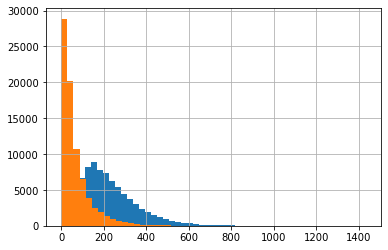

In [170]:
vistelsetid = (hbg_contact.Utskrivningstid - hbg_contact.Inskrivningstid).dt.seconds / 60
vntetid = (hbg_contact.time_doctor - hbg_contact.Inskrivningstid).dt.seconds / 60
vistelsetid.hist(bins=50)
vntetid.hist(bins=50)

In [171]:
(vntetid - hbg_contact.vntetid_frstalkarkontakt).describe()

count    79359.000000
mean        -0.486599
std         12.531080
min      -1441.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max       1440.000000
dtype: float64

In [172]:
(vntetid - hbg_contact.vntetid_frstalkarkontakt).describe()

count    79359.000000
mean        -0.486599
std         12.531080
min      -1441.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max       1440.000000
dtype: float64

Probably what we're seeing here is that there are some instances where either our calculated waiting time or the provided waiting time is zero while the other is not. The difference is small enough to not really matter though, and I prefer to store less data, which means I will just remove ```vntetid_frstalkarkontakt```.

#### Utskrivningsorsak
Column ```discharge_text```, probably corresponds to ```Utskrivningsorsak``` in Lund.

In [173]:
hbg_contact.discharge_text.value_counts()

Till avdelning       40314
Till hemmet          35564
Till sjukhus          2627
Avvikit                998
Till mottagning        684
Avslutad               275
Till primÌ?rvÌ´rd      239
Avliden                 84
Name: discharge_text, dtype: int64

Apart from the coding errors, these are the same categories as in Lund, although they have different distributions. 

#### Avdelning
Column ```infirmary_code``` appears to correspond roughly to ```Avdelning1``` at Lund. But with slightly different categories.

In [289]:
hbg_contact.infirmary_code.value_counts()

                              40145
Medicinavdelning 44            7535
AVA-H                          7276
AVA-MED                        6868
AVA-KIR                        2974
Medicin 41 Strokeenheten       1963
Medicinavdelning 46            1880
Medicinavdelning 48            1665
Medicinavdelning 45            1544
AVA-INF                        1521
Medicinavdelning 47            1254
IntensivvÌ´rdsavdelning         763
NÌ?rsjukvÌ´rdsavdelning         751
NÌ?rsjukvÌ´rdsavdelning 47      674
Ortopedavd. 38                  491
Kir 33                          349
AKARD                           302
Kir 31 kÌ?rl                    296
Gynavdelning                    279
Kir 31 urologi                  204
Med avd Stroke/Neuro            193
AKIR                            189
Ortopedavdelning 38             162
ANEUS                           158
AVA-16                          138
Kir 31onkologi                  101
AVA-Ì?RON                        92
AORTA                       

Annoyingly the coding errors do not appear to be consistent. It is unclear whether some of these can be merged, or if indeed we even care about them in the first place.

#### Besöksorsak 1 - 3
Columns ```visitcause_longtext_1-3```.

In [292]:
hbg_causes = hbg_contact[['visitcause_longtext_1', 'visitcause_longtext_2', 'visitcause_longtext_3']]
display(hbg_causes)

,visitcause_longtext_1,visitcause_longtext_2,visitcause_longtext_3
0,Extremitetsproblem RETTS-A 15,Extremitetsproblem RETTS-A 15,NaN
1,Konfusion VP,NaN,NaN
2,BrÌ¦stsmÌ?rta/BrÌ¦stkorgssmÌ?rta UNS RETTS-A 5...,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
81195,"Ì?gonproblem RETTS-A 37, metts-p 137","Ì?gonproblem RETTS-A 37, metts-p 137","Ì?gonproblem RETTS-A 37, metts-p 137"
81196,"DyspnÌ© RETTS-A 4, Retts-p 104",NaN,NaN
81197,BrÌ¦stsmÌ?rta/BrÌ¦stkorgssmÌ?rta UNS RETTS-A 5...,BrÌ¦stsmÌ?rta/BrÌ¦stkorgssmÌ?rta UNS RETTS-A 5...,NaN
81198,"SyncopÌ© RETTS-A 20, metts-p 120",NaN,NaN


In [294]:
list(sorted(hbg_causes.stack().unique()))

['Akut laryngofaryngit RETTS-A 46',
 'Allergi RETTS-A 43, Retts-p 143',
 'AndningsstillestÌ´nd VP',
 'Anemi RETTS-A 48, Retts-p 148',
 'AnsiktsfÌ¦rlamning oavsett orsak',
 'ApnÌ© metts-p 104',
 'Ascites RETTS-A 8, Retts-p 108',
 'Asystoli VP',
 'Avvikande laboratorieprover, Retts-A Ì¦vrigt',
 'BalanssvÌ´righet Retts-p 111',
 'Barn med dÌ´lig viktutveckling Retts-p 153',
 'Berusad 40',
 'Bett/stick djur UNS',
 'Blixtnedslag  RETTS-A 35, Retts-p 135',
 'Blodig upphostning oavsett mÌ?ngd. Inkluderar ej mag/tarmblÌ¦dning',
 'Blodsjukdomar Retts-p 148',
 'BlÌ¦dning som utgÌ´r frÌ´n mag-tarmkanalen',
 'BrÌ?nnskada METTS-T, 35',
 'BrÌ?nnskada RETTS-A 35',
 'BrÌ?nnskada/frÌ?tskada RETTS-A 35, metts-p 135',
 'BrÌ¦stkorgssmÌ?rta 5',
 'BrÌ¦stsmÌ?rta vid andning RETTS-A 4, Retts-p 104',
 'BrÌ¦stsmÌ?rta/BrÌ¦stkorgsmÌ?rta RETTS-A 5, RETTS-P 114',
 'BrÌ¦stsmÌ?rta/BrÌ¦stkorgssmÌ?rta UNS RETTS-A 5, Retts-p 105',
 'BuksmÌ?rta RETTS-A 6, Retts-p 106',
 'Chock UNS VP',
 'CirkulationsstillestÌ´nd VP',
 'De

In [296]:
code_map = {
    'Ì¦': 'ö',
    'Ì?': 'ä',
    'Ì´': 'å',
    'Ì©': 'é',
}

def fix_str(s):
    for k, v in code_map.items():
        s = s.replace(k, v)
    return s

list(sorted(map(fix_str, hbg_causes.stack().unique())))

['Akut laryngofaryngit RETTS-A 46',
 'Allergi RETTS-A 43, Retts-p 143',
 'Andningsstillestånd VP',
 'Anemi RETTS-A 48, Retts-p 148',
 'Ansiktsförlamning oavsett orsak',
 'Apné metts-p 104',
 'Ascites RETTS-A 8, Retts-p 108',
 'Asystoli VP',
 'Avvikande laboratorieprover, Retts-A övrigt',
 'Balanssvårighet Retts-p 111',
 'Barn med dålig viktutveckling Retts-p 153',
 'Berusad 40',
 'Bett/stick djur UNS',
 'Blixtnedslag  RETTS-A 35, Retts-p 135',
 'Blodig upphostning oavsett mängd. Inkluderar ej mag/tarmblödning',
 'Blodsjukdomar Retts-p 148',
 'Blödning som utgår från mag-tarmkanalen',
 'Brännskada METTS-T, 35',
 'Brännskada RETTS-A 35',
 'Brännskada/frätskada RETTS-A 35, metts-p 135',
 'Bröstkorgssmärta 5',
 'Bröstsmärta vid andning RETTS-A 4, Retts-p 104',
 'Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P 114',
 'Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Retts-p 105',
 'Buksmärta RETTS-A 6, Retts-p 106',
 'Chock UNS VP',
 'Cirkulationsstillestånd VP',
 'Delirium UNS VP',
 'Diabetes UN

In [308]:
pd.set_option('display.max_rows', 226)
display(hbg_causes.stack().apply(fix_str).value_counts().sort_index())
pd.reset_option('display.max_rows')

Akut laryngofaryngit RETTS-A 46                                                                        2
Allergi RETTS-A 43, Retts-p 143                                                                      374
Andningsstillestånd VP                                                                                13
Anemi RETTS-A 48, Retts-p 148                                                                        324
Ansiktsförlamning oavsett orsak                                                                       13
Apné metts-p 104                                                                                       6
Ascites RETTS-A 8, Retts-p 108                                                                        27
Asystoli VP                                                                                           12
Avvikande laboratorieprover, Retts-A övrigt                                                          206
Balanssvårighet Retts-p 111                            

#### Keys
Column: ```key_contact```

In [174]:
len(hbg_contact) - len(hbg_contact.key_contact.unique())

0

Looks all right to me.

#### Priority 1 - 3

In [298]:
hbg_contact[["priority_1", "priority_2", "priority_3"]].stack().value_counts()

3.0    50534
0.0    44737
5.0    33098
2.0    26260
1.0     8765
4.0     6487
6.0       22
7.0       12
dtype: int64

In Lund we only have the initial priority, but for Helsingborg apparently we have the "evolution" of the priority as the patient moves through the system. Unlike Lund, the data is numerical. It is unclear if we will need this data, or exactly at what stages of the system the priorities are updated for a patient. 

#### Diagnosis 1 - 6
We don't have any similar columns from Lund, but presumably any findings in here should also be present in the vårdkontakt table, so perhaps we want to check that for any discrepancies. 

In [300]:
akut_diags = hbg_contact[[f"akut_diag0{i}" for i in range(1, 7)]].dropna(axis='columns', how='all')
display(akut_diags)

,akut_diag01,akut_diag02,akut_diag03,akut_diag04,akut_diag05,akut_diag06
0,M796,NaN,NaN,NaN,NaN,NaN
1,F059,N390A,NaN,NaN,NaN,NaN
2,I489,NaN,NaN,NaN,NaN,NaN
3,S223,NaN,NaN,NaN,NaN,NaN
4,J189,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
81195,H531,NaN,NaN,NaN,NaN,NaN
81196,I209,NaN,NaN,NaN,NaN,NaN
81197,NaN,NaN,NaN,NaN,NaN,NaN
81198,R074,NaN,NaN,NaN,NaN,NaN


In [175]:
hbg_contact.dtypes

key_contact                         object
Alias                               object
age                                float64
kon                                  int64
demografi_OK                         int64
indl_dato                           object
ud_dato                             object
vistelsetid                        float64
discharge_text                      object
infirmary_code                      object
visitcause_longtext_1               object
visitcause_longtext_2               object
visitcause_longtext_3               object
priority_1                         float64
priority_2                         float64
priority_3                         float64
tid_lkare                           object
vntetid_frstalkarkontakt           float64
varddygn                           float64
vardtim                            float64
vardmin                            float64
vardtid                            float64
akut_diag01                         object
akut_diag02

The results here are very similar to Lund, and the data looks clean. 

### Deaths

### ECG
Files: 
```
 (4, 'ekg_Muse_id_H.csv'),
 (5, 'ekg_Phillips_id_H.csv')
```

#### Muse

In [344]:
hbg_ecg_muse = read_csv(hbg_paths[4])
display(hbg_ecg_muse)

,Alias,Sex,Age,Recdate,HAavledningskvalitet,Ventrate,Atrrate,PRint,QRSdur,QTint,...,QRSDUR_V4,QRSDUR_V5,QRSDUR_V6,QRSDUR_III,QRSDUR_aVR,QRSDUR_aVL,QRSDUR_aVF,Diagnosis,Insamlingsdatum,ekg_type
0,{0F3CC5B7-D38D-416C-B756-5A26DDD840AB},Male,66.0,30-Nov-2011 08:33:54,Green,98,98,190.0,98,350,...,98,98,98,98,98,98,98,NORMAL SINUSRYTM NORMALT EKG VID JâÃ¤MFâÃ...,",Muse",NaN
1,{C8C56311-F6AA-4C57-BDB7-A559E8CA155F},Female,105.0,11-Feb-2011 13:25:24,Green,87,91,NaN,98,362,...,84,88,98,79,72,78,81,FâÃ»RMAKSFLIMMER VâÃ¤NSTERSTâÃ¤LLD EL-A...,",Muse",NaN
2,{C8C56311-F6AA-4C57-BDB7-A559E8CA155F},Female,104.0,30-Mar-2010 11:38:56,Green,58,76,NaN,92,366,...,92,92,92,78,60,74,92,FâÃ»RMAKSFLIMMER MED LâÃ NGSAM KAMMARFREKV...,",Muse",NaN
3,{F79CA89D-B921-421B-9A53-B89606383C7B},Female,103.0,03-Mar-2010 14:09:55,Green,95,119,NaN,138,372,...,132,125,131,138,125,131,138,FâÃ»RMAKSFLIMMER MED VENTRIKULâÃ¤RA EXTRAS...,",Muse",NaN
4,{B3F243AE-A06B-4DEE-8C17-4AADBF7624A0},Male,102.0,02-Feb-2010 15:55:32,Yellow,45,136,NaN,94,446,...,94,94,94,94,94,94,94,FâÃ»RMAKSFLIMMER MED LâÃ NGSAM KAMMARFREKV...,",Muse",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85861,{E80E4877-6A5B-4772-A263-4052300562CD},Female,72.0,14-Aug-2014 09:58:09,Green,56,56,148.0,102,462,...,102,93,102,102,102,102,102,NÃ GOT LÃ NGSAM SINUSRYTM VÃNSTERKAMMARHYPER...,"14-Aug-2014 09:58:09,Muse",NaN
85862,{02F44577-0AB6-42C8-A9A6-57039FA9468A},Female,74.0,09-Aug-2014 15:45:43,Yellow,73,73,152.0,84,404,...,84,84,84,84,84,84,84,NORMAL SINUSRYTM NORMALT EKG INGA EKG TILLGÃ...,09-Aug-2014 15:45:43,Muse
85863,{2BAF906C-229D-4A11-8838-03B99BE14407},Male,72.0,06-Jul-2014 09:23:35,Green,64,64,134.0,92,440,...,92,92,92,92,92,92,92,NORMAL SINUSRYTM NORMALT EKG VID JÃMFÃRELSE...,"06-Jul-2014 09:23:35,Muse",NaN
85864,{45C6CFE2-5C18-4A1C-8FE2-D274F25D185B},Male,72.0,21-Mar-2014 07:50:44,Yellow,74,74,180.0,84,402,...,84,84,84,84,64,84,84,NORMAL SINUSRYTM LÃTTA T-FÃRÃNDRINGAR PATO...,"21-Mar-2014 07:50:44,Muse",NaN


In [348]:
list(hbg_ecg_muse.columns)

['Alias',
 'Sex',
 'Age',
 'Recdate',
 'HAavledningskvalitet',
 'Ventrate',
 'Atrrate',
 'PRint',
 'QRSdur',
 'QTint',
 'QTc',
 'Paxis',
 'Raxis',
 'Taxis',
 'QRScount',
 'Qonset',
 'Qend',
 'Ponset',
 'Pend',
 'Tend',
 'QTcFrederica',
 'PONA_I',
 'PONA_II',
 'PONA_V1',
 'PONA_V2',
 'PONA_V3',
 'PONA_V4',
 'PONA_V5',
 'PONA_V6',
 'PONA_III',
 'PONA_aVR',
 'PONA_aVL',
 'PONA_aVF',
 'PAMP_I',
 'PAMP_II',
 'PAMP_V1',
 'PAMP_V2',
 'PAMP_V3',
 'PAMP_V4',
 'PAMP_V5',
 'PAMP_V6',
 'PAMP_III',
 'PAMP_aVR',
 'PAMP_aVL',
 'PAMP_aVF',
 'PDUR_I',
 'PDUR_II',
 'PDUR_V1',
 'PDUR_V2',
 'PDUR_V3',
 'PDUR_V4',
 'PDUR_V5',
 'PDUR_V6',
 'PDUR_III',
 'PDUR_aVR',
 'PDUR_aVL',
 'PDUR_aVF',
 'bmPAR_I',
 'bmPAR_II',
 'bmPAR_V1',
 'bmPAR_V2',
 'bmPAR_V3',
 'bmPAR_V4',
 'bmPAR_V5',
 'bmPAR_V6',
 'bmPAR_III',
 'bmPAR_aVR',
 'bmPAR_aVL',
 'bmPAR_aVF',
 'bmPI_I',
 'bmPI_II',
 'bmPI_V1',
 'bmPI_V2',
 'bmPI_V3',
 'bmPI_V4',
 'bmPI_V5',
 'bmPI_V6',
 'bmPI_III',
 'bmPI_aVR',
 'bmPI_aVL',
 'bmPI_aVF',
 'PpAMP_I',
 'PpA

In [346]:
hbg_ecg_muse.HAavledningskvalitet.value_counts()

Green     69298
Yellow    15850
Red         688
Name: HAavledningskvalitet, dtype: int64

#### Phillips

In [349]:
hbg_ecg_ph = read_csv(hbg_paths[5])
display(hbg_ecg_ph)

,Alias,Gender,Age,Date,heartrat,qrsaxis,paxis,taxis,pdur,qrsdur,...,deltaw_III,deltaw_aVR,deltaw_aVL,deltaw_aVF,deltaw_V1,deltaw_V2,deltaw_V3,deltaw_V4,deltaw_V5,deltaw_V6
0,{046C6BA3-914D-4A3D-BE51-40A375CECACA},Male,78,18-Nov-2013 20:21:39,66,-42.0,90.0,131.0,136.0,106.0,...,0,0,0,0,0,0,0,0,0,0
1,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},Male,92,02-Sep-2012 20:42:44,115,-16.0,-1.0,68.0,94.0,106.0,...,0,0,0,0,0,0,0,0,0,0
2,{AA6AE776-5C5F-4660-8EDA-2B966D2AE7F2},Male,92,28-Jun-2012 19:27:06,89,-62.0,60.0,13.0,68.0,126.0,...,0,0,0,0,0,0,0,0,0,0
3,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},Male,74,04-Feb-2012 10:22:01,116,-16.0,102.0,86.0,116.0,102.0,...,0,0,0,0,0,0,0,0,0,0
4,{241C6721-DFC9-4EE9-94B5-BF1925C1918E},Male,76,14-Apr-2014 19:56:59,124,-45.0,110.0,99.0,82.0,110.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,{E2EE4CB6-CB01-4D4E-A90C-FFEE869254A0},Unknown,0,01-Oct-2012 17:37:46,76,-83.0,7.0,26.0,100.0,168.0,...,0,0,0,0,0,0,0,0,0,0
8415,{BA78D5DF-C5EF-4984-B6DE-41FBD5459EA4},Unknown,0,20-Oct-2012 14:21:48,109,85.0,78.0,81.0,130.0,88.0,...,0,0,0,0,0,0,0,0,0,0
8416,{CD59C988-D882-4ACA-A26B-576BD7BD58A3},Unknown,-1,18-Sep-2014 17:36:42,159,65.0,4.0,-10.0,48.0,90.0,...,0,0,0,0,0,0,0,0,0,0
8417,{5D06CBD8-57C7-449A-9324-5552E4D70656},Unknown,-1,30-Jun-2012 20:47:41,85,56.0,-3.0,58.0,110.0,86.0,...,0,0,0,0,0,0,0,0,0,0


In [351]:
hbg_ecg_ph.columns

Index(['Alias', 'Gender', 'Age', 'Date', 'heartrat', 'qrsaxis', 'paxis',
       'taxis', 'pdur', 'qrsdur',
       ...
       'deltaw_III', 'deltaw_aVR', 'deltaw_aVL', 'deltaw_aVF', 'deltaw_V1',
       'deltaw_V2', 'deltaw_V3', 'deltaw_V4', 'deltaw_V5', 'deltaw_V6'],
      dtype='object', length=378)

### The final four
The final four files have to do with breathing difficulties. I will take a quick look, but assuming they are not relevant to use right now.

In [176]:
dfs = [read_csv(path) for path in hbg_paths[-4:]]

In [177]:
dfs[0]

,Alias,Datum för procedur,Segment,Graft,Stenosgrad
0,{2E34A7E0-D789-4849-9911-F5515DEEC005},2011-08-22,PDA/RPD (4),Vengraft,0-29%
1,{2E34A7E0-D789-4849-9911-F5515DEEC005},2011-08-22,Mellersta LAD (7),Artärgraft,100%
2,{2E34A7E0-D789-4849-9911-F5515DEEC005},2011-08-22,Första obtusa marginal (12),Vengraft,0-29%
3,{0C550F4B-3ABD-49D9-B848-E5E33B009A08},2013-03-28,PDA/RPD (4),Vengraft,0-29%
4,{0C550F4B-3ABD-49D9-B848-E5E33B009A08},2013-03-28,Mellersta LAD (7),Artärgraft,0-29%
...,...,...,...,...,...
736,{23BB6FBD-5ADB-4E8F-83B0-A79E5B87AC3C},2013-06-12,Andra diagonal (10),Vengraft,0-29%
737,{23BB6FBD-5ADB-4E8F-83B0-A79E5B87AC3C},2013-06-12,Första obtusa marginal (12),Vengraft,0-29%
738,{0F563689-8096-4D9A-BDE4-50E8E77F1615},2012-12-10,Andra obtusa marginal (13),Vengraft,0-29%
739,{0F563689-8096-4D9A-BDE4-50E8E77F1615},2012-12-10,PDA/RPD (4),Vengraft,0-29%


In [178]:
dfs[1]

,Alias,Typ av procedur,Procedurtyp,Datum för procedur,Jourtid,Tidigare PCI,Tidigare CABG,Diabetes,Indikation,Killip klass,...,Proximala LCx (11),Första obtusa marginal (12),Andra obtusa marginal (13),Distala LCx (14),LPD (15),PLA från vänster (16),Intermediär (17),PLA (18),Högerkammargren (19),Septal (20)
0,{AB2D5E1F-B381-485E-8554-BD44A1AC84C8},ANGIO,ANGIO,2014-01-13,Subakut på kontorstid,Nej,Nej,Nej,Instabil angina pectoris,Killip I,...,0-29%,0-29%,0-29%,0-29%,-,-,-,0-29%,0-29%,0-29%
1,{6787472B-3338-4C79-A71A-81B64B5217A4},PCIADHOC,PCIADHOC,2012-12-31,Subakut på kontorstid,Nej,Nej,Nej,Instabil kranskärlssjukdom,Killip III,...,70-89%,100%,0-29%,0-29%,-,-,-,0-29%,0-29%,0-29%
2,{F6439160-C28F-4954-8065-A4D968DFB3EE},ANGIO,ANGIO,2010-06-30,Planerad på kontorstid,Ja,Ja,Nej,Instabil kranskärlssjukdom,Killip I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{22DE2354-53B6-4FD0-84D3-F40985F83C1F},ANGIO,ANGIO,2012-07-24,Subakut på kontorstid,Nej,Nej,Ja,Stabil angina pectoris,Killip I,...,0-29%,0-29%,0-29%,0-29%,-,-,-,0-29%,0-29%,0-29%
4,{22DE2354-53B6-4FD0-84D3-F40985F83C1F},PCI,PCI,2012-07-31,Planerad på kontorstid,Nej,Nej,Ja,Stabil angina pectoris,Killip II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,{43620CEC-5E93-4FBE-B8DE-1A6338AE9B38},ANGIO,ANGIO,2012-01-05,Akutfall på kontorstid,Nej,Nej,Nej,STEMI,Killip I,...,0-29%,0-29%,0-29%,0-29%,-,-,-,0-29%,0-29%,0-29%
3842,{349AEA96-067B-4E81-B18A-10734C0A4C9E},ANGIO,ANGIO,2014-01-16,Subakut på kontorstid,Nej,Nej,Nej,NSTEMI,NaN,...,0-29%,0-29%,0-29%,0-29%,-,-,-,50-69%,0-29%,0-29%
3843,{73A1D01C-5BAE-4525-8006-A10565BD0077},PCIADHOC,PCIADHOC,2014-08-19,Subakut på jourtid,Nej,Nej,Nej,Instabil angina pectoris,Killip I,...,0-29%,0-29%,0-29%,0-29%,-,-,-,0-29%,0-29%,0-29%
3844,{7BFC4376-BCB7-4941-8518-5926E1EC8A7D},ANGIO,ANGIO,2010-06-18,Planerad på kontorstid,Nej,Nej,Nej,Hjärtsvikt/kardiomyopatiutredning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
dfs[2]

,Alias,EVENTDATE,Segmentnummer,Graft,FFR,IVUS,iFR,OCT,NIRS,IMR,CFR,PdPa,Pa_hyperemi,Pd_hyperemi
0,{6D2CC76B-7416-4612-892B-153442377830},2013-11-06,Proximala RCA (1),Nej,NaN,IVUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{377A3E16-A0BA-4742-9F35-3D5EBDFF3CFF},2013-11-07,Proximala LAD (6),Nej,NaN,IVUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{9B6179CC-A8DC-43D4-93FE-284E1DC5A4FB},2014-02-03,Proximala RCA (1),Nej,NaN,IVUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{9B6179CC-A8DC-43D4-93FE-284E1DC5A4FB},2014-02-03,Första diagonal (9),Artär,NaN,NaN,iFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{9B6179CC-A8DC-43D4-93FE-284E1DC5A4FB},2014-02-03,Första obtusa marginal (12),Nej,NaN,NaN,iFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,{208D3502-9189-4C2C-9D87-B5BD45CF87B9},2013-11-01,Vä huvudstam (5),Nej,NaN,IVUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,{30FD6206-E829-4BC9-BF0D-C50C0B7EA0D7},2013-07-02,Distala LAD (8),Nej,FFR,NaN,iFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,{54B85A73-D855-439A-ACEC-47AABEEE23C3},2014-02-12,Mellersta LAD (7),Nej,FFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,{A1AC88B2-FFD0-4C24-B120-43D3A9A9D4A8},2014-05-07,Proximala LCx (11),Nej,FFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
dfs[3]

,Alias,Datum för procedur,Segmentnummer,Graft,Nummer på stenos i samma segment,Ocklusion,Stenostyp,Stenosklass,Procedurtyp,Ballongslut,Lokal framgång,Ocklusion_2,Restenosdatum
0,{4CA544B0-74C2-4E9D-8818-2DECA7152243},2013-02-21,Distala LCx (14),Nej,Första,Nej,DeNovo,B1,Ballong + Stent,NaN,Ja,NaN,NaN
1,{4CA544B0-74C2-4E9D-8818-2DECA7152243},2013-02-21,Distala LCx (14),Nej,Första,Nej,DeNovo,A,Direktstent,NaN,Ja,NaN,NaN
2,{4CA544B0-74C2-4E9D-8818-2DECA7152243},2013-02-21,Proximala RCA (1),Nej,Andra,Nej,DeNovo,A,Ballong + Stent,NaN,Ja,NaN,NaN
3,{4CA544B0-74C2-4E9D-8818-2DECA7152243},2013-02-21,Proximala RCA (1),Nej,Första,Nej,DeNovo,A,Ballong + Stent,NaN,Ja,NaN,NaN
4,{2E34A7E0-D789-4849-9911-F5515DEEC005},2011-08-22,Distala LAD (8),Nej,Första,Nej,DeNovo,A,Direktstent,NaN,Ja,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,{514E0AB9-A0A6-4ABA-A149-B03D944F2265},2012-12-13,Distala RCA (3),Nej,Första,Nej,DeNovo,B1,Ballong + Stent,NaN,Ja,NaN,NaN
3942,{87F20C76-4F2B-4599-9DD3-48A3232AF769},2013-05-17,Proximala RCA (1),Nej,Första,"Ja, >=3 mån",DeNovo,C,Ledarförsök,NaN,Nej,NaN,NaN
3943,{87F20C76-4F2B-4599-9DD3-48A3232AF769},2013-05-17,Proximala LAD (6),Nej,Första,Nej,DeNovo,C,Ballong + Stent,NaN,Ja,NaN,NaN
3944,{87F20C76-4F2B-4599-9DD3-48A3232AF769},2013-05-17,Intermediär (17),Nej,Första,Nej,DeNovo,B2,Ballong + Stent,NaN,Ja,NaN,NaN


## Results

## Discussion

## Suggestion for further work

## References
Structure of a technical report https://unilearning.uow.edu.au/report/3b.html

## Appendix